In [ ]:
!pip install scorecardpy

     |████████████████████████████████| 55 kB 2.1 MB/s 
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57845 sha256=47d41e4226e6c07d9b00b384df25765ae83be4e038d5e856fb66afd4ac68f1b3
  Stored in directory: /root/.cache/pip/wheels/9d/50/52/715367c478fd2e2317070ccf6539b2c29fc8168144cfbfaeac
Successfully built scorecardpy


In [ ]:
from string import ascii_letters
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
bankcredit_data = pd.read_csv("CC_Modeling_Data.txt", sep='\t', engine='python', header= None)

In [ ]:
bankcredit_data.columns = [
'ID_CLIENT',
'CLERK_TYPE',
'PAYMENT_DAY',
'APPLICATION_SUBMISSION_TYPE',
'QUANT_ADDITIONAL_CARDS',
'POSTAL_ADDRESS_TYPE',
'SEX',
'MARITAL_STATUS',
'QUANT_DEPENDANTS',
'EDUCATION_LEVEL_S',
'STATE_OF_BIRTH',
'CITY_OF_BIRTH',
'NACIONALITY',
'RESIDENCIAL_STATE',
'RESIDENCIAL_CITY',
'RESIDENCIAL_BOROUGH',
'FLAG_RESIDENCIAL_PHONE',
'RESIDENCIAL_PHONE_AREA_CODE',
'RESIDENCE_TYPE',
'MONTHS_IN_RESIDENCE',
'FLAG_MOBILE_PHONE',
'FLAG_EMAIL',
'PERSONAL_MONTHLY_INCOME',
'OTHER_INCOMES',
'FLAG_VISA',
'FLAG_MASTERCARD',
'FLAG_DINERS',
'FLAG_AMERICAN_EXPRESS',
'FLAG_OTHER_CARDS',
'QUANT_BANKING_ACCOUNTS',
'QUANT_SPECIAL_BANKING_ACCOUNTS',
'PERSONAL_ASSETS_VALUE',
'QUANT_CARS',
'COMPANY',
'PROFESSIONAL_STATE',
'PROFESSIONAL_CITY',
'PROFESSIONAL_BOROUGH',
'FLAG_PROFESSIONAL_PHONE',
'PROFESSIONAL_PHONE_AREA_CODE',
'MONTHS_IN_THE_JOB',
'PROFESSION_CODE',
'OCCUPATION_TYPE',
'MATE_PROFESSION_CODE',
'EDUCATION_LEVEL',
'FLAG_HOME_ADDRESS_DOCUMENT',
'FLAG_RG',
'FLAG_CPF',
'FLAG_INCOME_PROOF',
'PRODUCT',
'FLAG_ACSP_RECORD',
'AGE',
'RESIDENCIAL_ZIP_3',
'PROFESSIONAL_ZIP_3',
'TARGET']

In [ ]:
bankcredit_data.head()


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL_S,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


bankcredit_data.dtypes

Here are the summary statistics of the variables.




In [ ]:
bankcredit_data.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL_S,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


# Data Preprocessing

The goal of this step is to leave the date ready to apply models to it. 
In general we want to:

1. Eliminate redundant and unethical variables
2. Treat empty and duplicate entries
3. Treat null values
4. Make data categorical wherever necessary
5. Treat outliers
6. Remove correlated features


---

We can see few variables with same values for all records, thus removing them from our dataframe.

Also, eliminating redundant variables.

---



In [ ]:
bankcredit_data = bankcredit_data.drop(['ID_CLIENT',
                                        'CLERK_TYPE',
                                        'PAYMENT_DAY',
                                        'APPLICATION_SUBMISSION_TYPE',
                      'QUANT_ADDITIONAL_CARDS', 
                      'EDUCATION_LEVEL_S', 
                      'SEX',
                      'STATE_OF_BIRTH',
                      'CITY_OF_BIRTH',
                      'RESIDENCIAL_STATE',
                      'RESIDENCIAL_CITY',
                      'RESIDENCIAL_BOROUGH',
                      'RESIDENCIAL_PHONE_AREA_CODE',
                      'FLAG_MOBILE_PHONE', 
                      'QUANT_CARS',
                      'PROFESSIONAL_STATE',
                      'PROFESSIONAL_CITY',
                      'PROFESSIONAL_BOROUGH',
                      'PROFESSIONAL_PHONE_AREA_CODE',
                      'OCCUPATION_TYPE',
                      'FLAG_ACSP_RECORD',
                      'FLAG_HOME_ADDRESS_DOCUMENT',
                      'FLAG_RG',
                      'FLAG_CPF',
                      'FLAG_INCOME_PROOF',], axis = 1)


In [ ]:
bankcredit_data.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,1,6,1,1,Y,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,N,N,0,9.0,NaN,NaN,1,32,595,595,1
1,1,2,0,1,Y,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,Y,N,0,11.0,11.0,NaN,1,34,230,230,1
2,1,2,0,1,Y,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,N,N,0,11.0,NaN,NaN,1,27,591,591,0
3,1,2,0,1,N,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,N,N,0,NaN,NaN,NaN,1,61,545,545,0
4,1,2,0,1,Y,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,N,N,0,9.0,NaN,NaN,1,48,235,235,1


---
Treating data and replacing all empty values to NaN

---

In [ ]:
bankcredit_data = bankcredit_data.dropna(subset=['TARGET'])

In [ ]:
bankcredit_data["RESIDENCIAL_ZIP_3"] = bankcredit_data["RESIDENCIAL_ZIP_3"].str.replace('#DIV/0!' , '0')
bankcredit_data["RESIDENCIAL_ZIP_3"] = bankcredit_data["RESIDENCIAL_ZIP_3"].str.replace(' ' , '0')

In [ ]:
c = (bankcredit_data["RESIDENCIAL_ZIP_3"].values == '')        
r = any(c)
r

False

In [ ]:
c = (bankcredit_data["PROFESSIONAL_ZIP_3"].values == '')        
r = any(c)
r

False

In [ ]:
bankcredit_data["PROFESSIONAL_ZIP_3"] = bankcredit_data["PROFESSIONAL_ZIP_3"].str.replace('#DIV/0!' , '0')
bankcredit_data["PROFESSIONAL_ZIP_3"] = bankcredit_data["PROFESSIONAL_ZIP_3"].str.replace(' ' , '0')

In [ ]:
bankcredit_data.replace(" ", np.NaN) 

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,1,6,1,1,Y,1.0,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0.0,N,N,0,9.0,NaN,NaN,1,32,595,595,1
1,1,2,0,1,Y,1.0,1.0,1,750.00,0.0,0,0,0,0,0,0,0,0.0,Y,N,0,11.0,11.0,NaN,1,34,230,230,1
2,1,2,0,1,Y,1.0,NaN,1,500.00,0.0,0,0,0,0,0,0,0,0.0,N,N,0,11.0,NaN,NaN,1,27,591,591,0
3,1,2,0,1,N,NaN,NaN,1,500.00,0.0,0,0,0,0,0,0,0,0.0,N,N,0,NaN,NaN,NaN,1,61,545,545,0
4,1,2,0,1,Y,1.0,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,N,N,0,9.0,NaN,NaN,1,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,2,1,Y,1.0,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,N,N,0,9.0,0.0,0.0,1,36,591,591,1
49996,1,1,0,1,Y,1.0,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0.0,N,N,0,NaN,NaN,NaN,2,21,186,186,0
49997,1,2,3,1,Y,2.0,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,Y,Y,0,9.0,NaN,NaN,1,41,715,715,0
49998,1,1,1,1,Y,1.0,NaN,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,Y,Y,0,9.0,NaN,NaN,1,28,320,320,1


---
Converting variables to categorical

---

In [ ]:
bankcredit_data = bankcredit_data.replace('Y', 1)
bankcredit_data = bankcredit_data.replace('N', 0)


## Data Cleaning

---
Checking any duplicate records

---


In [ ]:
a = bankcredit_data
duplicate = a[a.duplicated()]
duplicate

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
12213,1,1,0,1,1,1.0,0.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,0,0,0,0.0,0.0,0.0,1,24,639,639,1
14179,1,1,0,1,1,1.0,4.0,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,NaN,NaN,1,21,960,960,0
17955,1,1,0,1,1,1.0,5.0,1,620.0,0.0,0,0,0,0,0,0,0,0.0,1,1,0,9.0,NaN,NaN,2,35,380,380,1
20307,1,2,0,1,1,1.0,5.0,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,2.0,NaN,NaN,1,19,781,781,1
20605,1,1,0,1,1,1.0,NaN,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,NaN,NaN,NaN,1,22,639,639,0
21730,1,1,0,1,1,1.0,NaN,1,350.0,0.0,0,0,0,0,0,0,0,0.0,1,0,0,NaN,NaN,NaN,1,34,555,555,0
21922,1,1,0,1,1,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,NaN,NaN,NaN,1,20,147,147,0
23088,1,1,0,1,1,1.0,10.0,1,800.0,0.0,0,0,0,0,0,0,0,30000.0,1,0,0,NaN,NaN,NaN,1,18,728,728,0
24441,1,2,0,1,0,1.0,10.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,1,0,9.0,0.0,0.0,1,28,628,628,0
24974,1,2,0,1,1,1.0,5.0,1,350.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,2.0,NaN,NaN,1,26,781,781,1


In [ ]:
bankcredit_data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
bankcredit_data

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,1,6,1,1,1,1.0,15.0,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,0,0,9.0,NaN,NaN,1,32,595,595,1
1,1,2,0,1,1,1.0,1.0,1,750.00,0.0,0,0,0,0,0,0,0,0.0,1,0,0,11.0,11.0,NaN,1,34,230,230,1
2,1,2,0,1,1,1.0,NaN,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,0,11.0,NaN,NaN,1,27,591,591,0
3,1,2,0,1,0,NaN,NaN,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,0,0,NaN,NaN,NaN,1,61,545,545,0
4,1,2,0,1,1,1.0,12.0,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,NaN,NaN,1,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1,2,1,1,1.0,14.0,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,0,0,0,9.0,0.0,0.0,1,36,591,591,1
49996,1,1,0,1,1,1.0,15.0,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,0,0,NaN,NaN,NaN,2,21,186,186,0
49997,1,2,3,1,1,2.0,5.0,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,1,1,0,9.0,NaN,NaN,1,41,715,715,0
49998,1,1,1,1,1,1.0,NaN,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,1,1,0,9.0,NaN,NaN,1,28,320,320,1


## Splitting the data into training and testing dataset

In [ ]:
# X = bankcredit_data.drop("TARGET", axis = 1)
# y = bankcredit_data['TARGET']

In [ ]:
train, test = sc.split_df(bankcredit_data.iloc[:,1:],
                          y = 'TARGET',
                          ratio = 0.7,
                          seed = 251139213).values()

In [ ]:
# train, test = sc.split_df(X, y ,
#                           ratio = 0.7,
#                           seed = 251139213).values()

In [ ]:
bankcredit_data['PROFESSIONAL_ZIP_3'] = bankcredit_data['PROFESSIONAL_ZIP_3'].convert_dtypes() 
bankcredit_data['PROFESSIONAL_ZIP_3'] = pd.to_numeric(bankcredit_data['PROFESSIONAL_ZIP_3'], errors='coerce').convert_dtypes() 

In [ ]:
bankcredit_data['PROFESSIONAL_ZIP_3'].dtypes

Int64Dtype()

In [ ]:
bankcredit_data['RESIDENCIAL_ZIP_3'] = bankcredit_data['RESIDENCIAL_ZIP_3'].convert_dtypes() 
bankcredit_data['RESIDENCIAL_ZIP_3'] = pd.to_numeric(bankcredit_data['RESIDENCIAL_ZIP_3'], errors='coerce').convert_dtypes() 

---
Checking for Null values

---


In [ ]:
train.isnull().any()

MARITAL_STATUS                    False
QUANT_DEPENDANTS                  False
NACIONALITY                       False
FLAG_RESIDENCIAL_PHONE            False
RESIDENCE_TYPE                     True
MONTHS_IN_RESIDENCE                True
FLAG_EMAIL                        False
PERSONAL_MONTHLY_INCOME           False
OTHER_INCOMES                     False
FLAG_VISA                         False
FLAG_MASTERCARD                   False
FLAG_DINERS                       False
FLAG_AMERICAN_EXPRESS             False
FLAG_OTHER_CARDS                  False
QUANT_BANKING_ACCOUNTS            False
QUANT_SPECIAL_BANKING_ACCOUNTS    False
PERSONAL_ASSETS_VALUE             False
COMPANY                           False
FLAG_PROFESSIONAL_PHONE           False
MONTHS_IN_THE_JOB                 False
PROFESSION_CODE                    True
MATE_PROFESSION_CODE               True
EDUCATION_LEVEL                    True
PRODUCT                           False
AGE                               False


In [ ]:
null_columns = train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

RESIDENCE_TYPE            932
MONTHS_IN_RESIDENCE      2640
PROFESSION_CODE          5442
MATE_PROFESSION_CODE    20174
EDUCATION_LEVEL         22623
dtype: int64

### Null values

The core function here will be Panda's [```fillna```]. This allows to replace all null values (represented by None or NaN in Python) by a certain value. This also allows to set what the replacement will be with the ```value``` argument. 

Remember the strategies to deal :

1. Keep: If the null values are a category by themselves. In this case, replace by something meaningful.

2. Delete: If the null values are too many **either by row or by column** then it is better to just drop the case or the variable.

3. Replace: If there are only a few missings for the variable or the row (<1% total), replace by the  replace the null values by the **median** for continous variables, and the **mode** for categorical values.

Let's study our dataset's null values. The [```isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function returns which elements in the dataframe are null. The [```any()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) function returns a list with whatever columns (default) or rows (passing ```axis = 1``` to the function) have any element with a boolean of true.

In [ ]:
bankcredit_data['RESIDENCE_TYPE'].fillna(train['RESIDENCE_TYPE'].median(), inplace=True) # Median = mode
bankcredit_data['MONTHS_IN_RESIDENCE'].fillna(train['MONTHS_IN_RESIDENCE'].median(), inplace=True)
bankcredit_data['PROFESSION_CODE'].fillna(train['PROFESSION_CODE'].median(), inplace=True) #Median = Mode

# test['RESIDENCE_TYPE'].fillna(train['RESIDENCE_TYPE'].median(), inplace=True) # Median = mode
# test['MONTHS_IN_RESIDENCE'].fillna(train['MONTHS_IN_RESIDENCE'].median(), inplace=True)
# test['PROFESSION_CODE'].fillna(train['PROFESSION_CODE'].median(), inplace=True) #Median = Mode



We can see 2 columns have higher null values. Let's study them in further detail.

In [ ]:
train['MATE_PROFESSION_CODE'].describe()

count    14802.000000
mean         3.805837
std          5.206706
min          0.000000
25%          0.000000
50%          0.000000
75%         11.000000
max         17.000000
Name: MATE_PROFESSION_CODE, dtype: float64

In [ ]:
train['EDUCATION_LEVEL'].describe()

count    12353.000000
mean         0.292156
std          0.947907
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: EDUCATION_LEVEL, dtype: float64

In [ ]:
# There can be scenario where the applicant has no spouse and thus the Mate Profession code and Education Level is blank.
# Also, it could be possible that the spouse has no job or has no education or the applicant didn't share the data.
# As we don't know the encoding for category of Marital Status, Mate Profession code and Education Level, so we can't split the above scenarios on the basis of any assumption. 
# So, replacing Null values by creating another category, say 20 covering the above scenarios.

bankcredit_data['MATE_PROFESSION_CODE'].fillna(value = 20, inplace=True)
bankcredit_data['EDUCATION_LEVEL'].fillna(value = 20, inplace=True)


In [ ]:
null_columns = bankcredit_data.columns[bankcredit_data.isnull().any()]
bankcredit_data[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
train.head()

,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,6,1,1,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,0,0,9.0,NaN,NaN,1,32,595,595,1
1,2,0,1,1,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,1,0,0,11.0,11.0,NaN,1,34,230,230,1
3,2,0,1,0,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,NaN,NaN,NaN,1,61,545,545,0
4,2,0,1,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,NaN,NaN,1,48,235,235,1
5,2,0,1,1,1.0,4.0,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,0,0,9.0,0.0,0.0,2,40,371,371,1


In [ ]:
# bankcredit_data.to_excel("P1.xlsx")  

---

Visualizing data

---

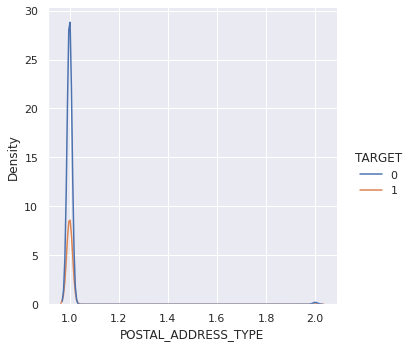

In [ ]:
sns.set(color_codes=True)

sns.displot(data = bankcredit_data, x = 'POSTAL_ADDRESS_TYPE', hue = "TARGET", kind = 'kde')

In [ ]:
# bankcredit_data = bankcredit_data.astype({"POSTAL_ADDRESS_TYPE":'category'})

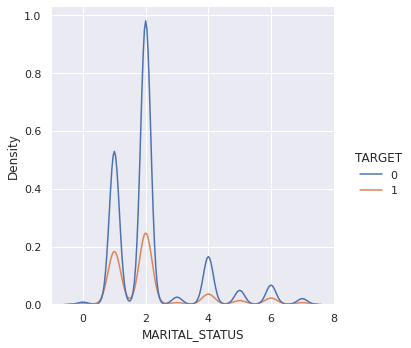

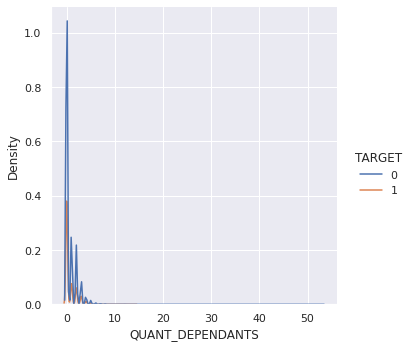

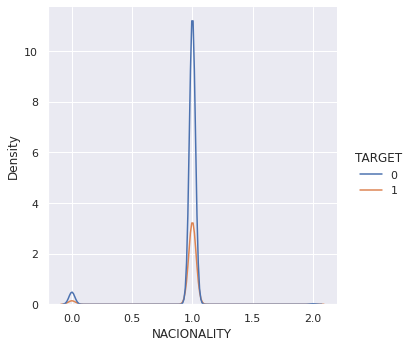

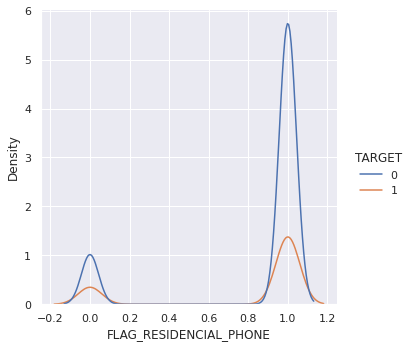

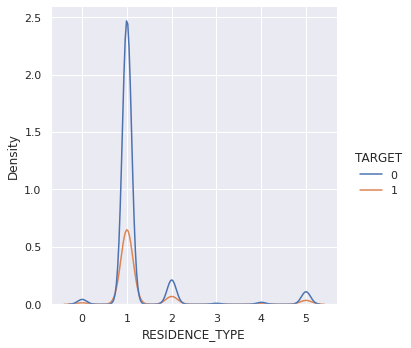

In [ ]:
sns.set(color_codes=True)

for col_id in bankcredit_data.columns[np.r_[1,2:6]]:
  sns.displot(data = bankcredit_data, x = col_id, hue = "TARGET", kind = 'kde')

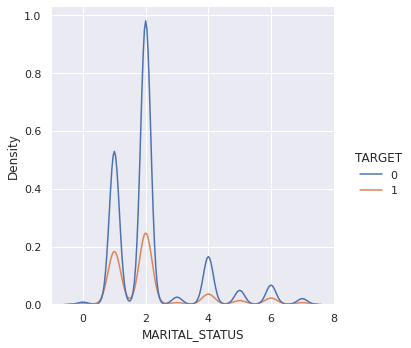

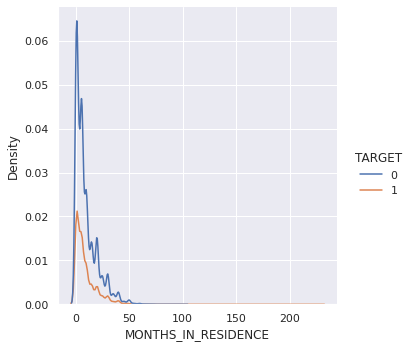

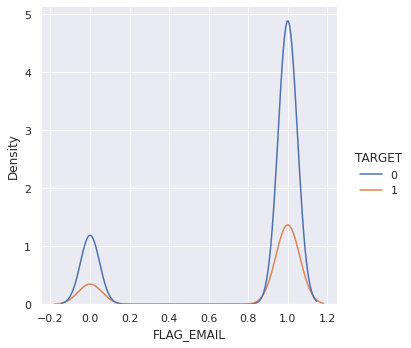

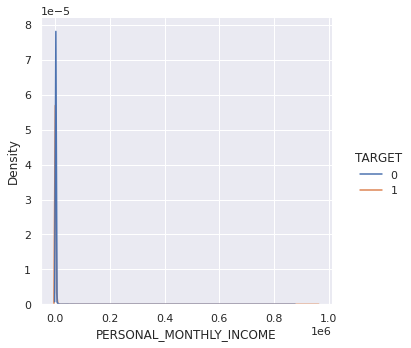

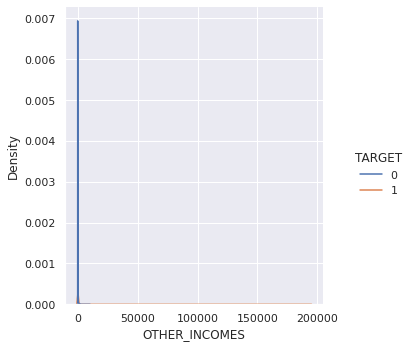

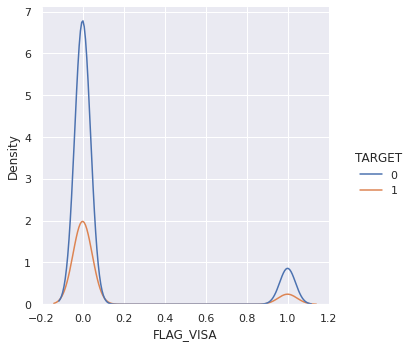

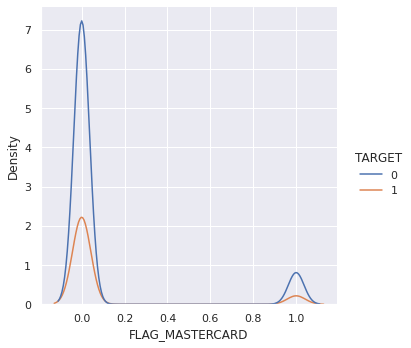

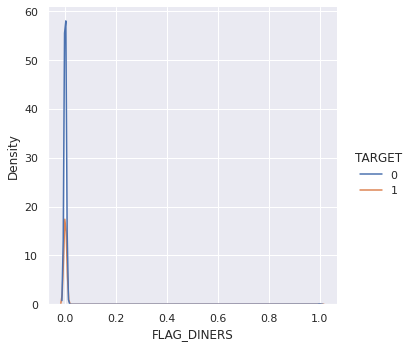

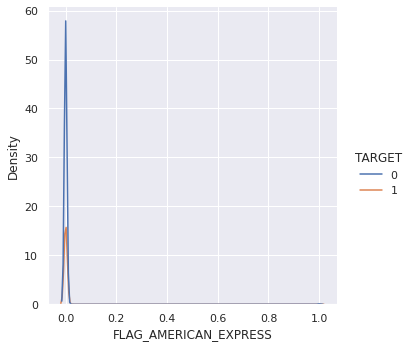

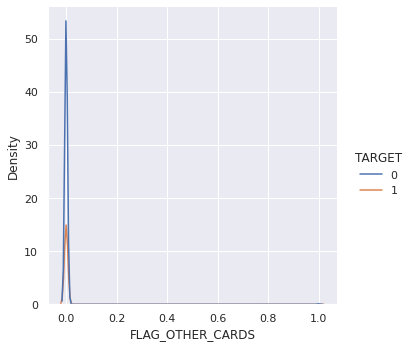

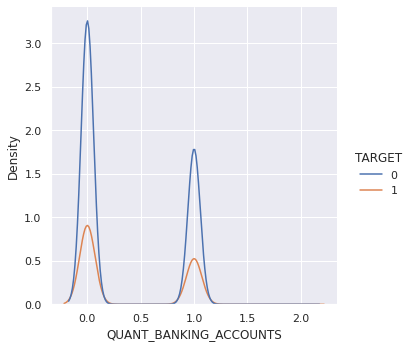

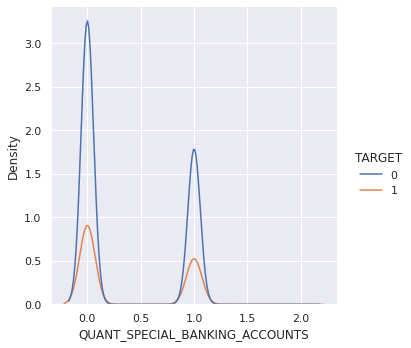

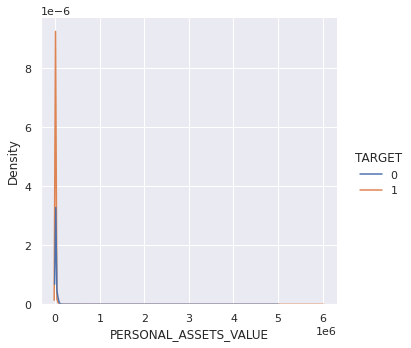

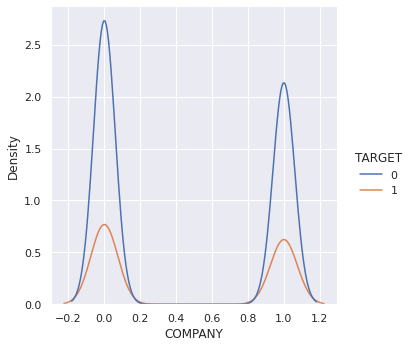

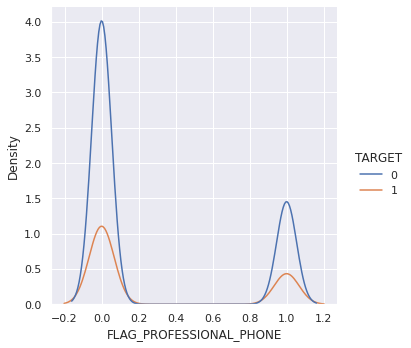

In [ ]:

for col_id in bankcredit_data.columns[np.r_[1,6:20]]:
  sns.displot(data = bankcredit_data, x = col_id, hue = "TARGET", kind = 'kde')

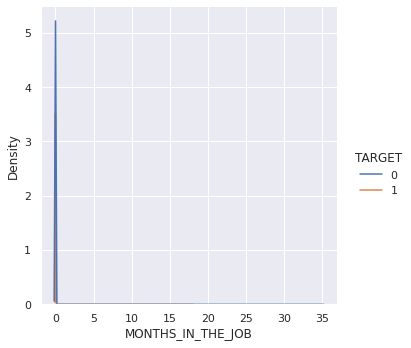

In [ ]:
sns.displot(data = bankcredit_data, x = 'MONTHS_IN_THE_JOB', hue = "TARGET", kind = 'kde')

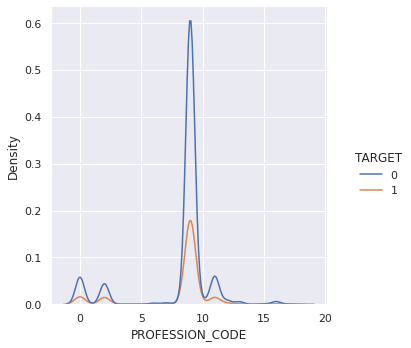

In [ ]:
sns.displot(data = bankcredit_data, x = 'PROFESSION_CODE', hue = "TARGET", kind = 'kde')

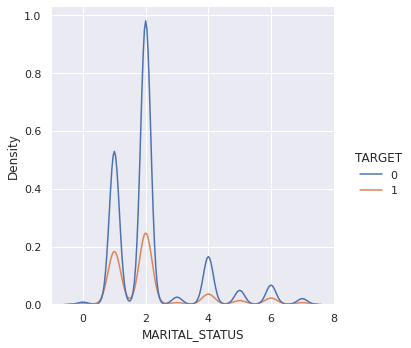

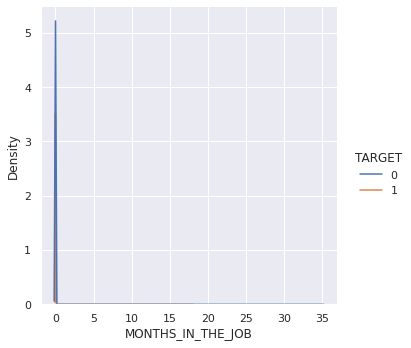

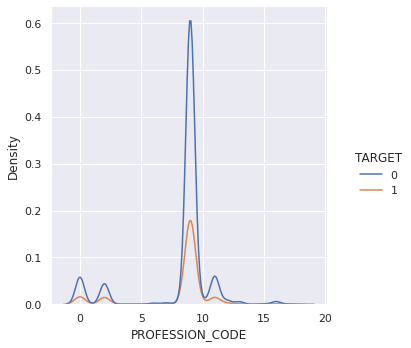

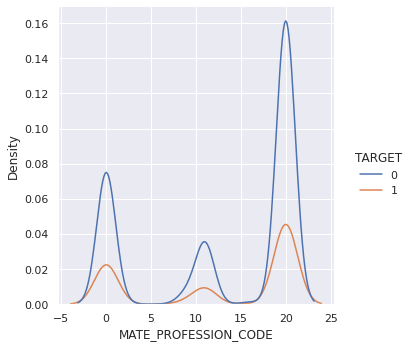

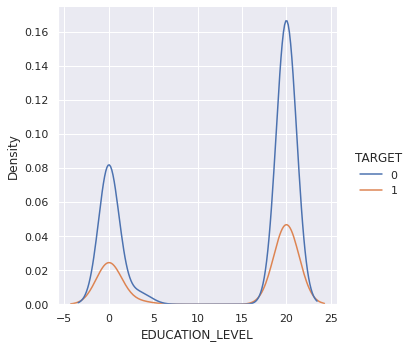

In [ ]:
for col_id in bankcredit_data.columns[np.r_[1,20:24]]:
  sns.displot(data = bankcredit_data, x = col_id, hue = "TARGET", kind = 'kde')

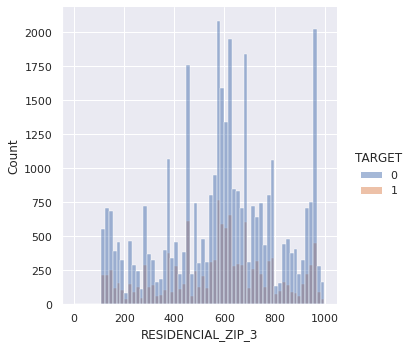

In [ ]:
sns.displot(data = bankcredit_data, x = 'RESIDENCIAL_ZIP_3', hue = "TARGET", kind = 'hist')

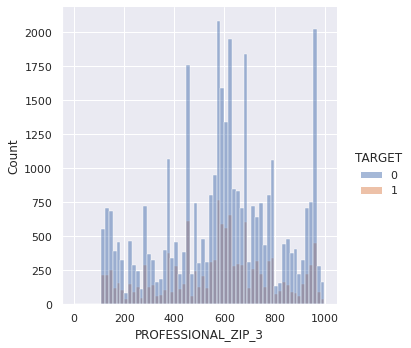

In [ ]:
sns.displot(data = bankcredit_data, x = 'PROFESSIONAL_ZIP_3', hue = "TARGET", kind ='hist')

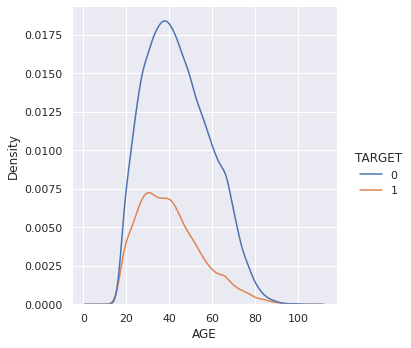

In [ ]:
sns.displot(data = bankcredit_data, x = 'AGE', hue = "TARGET", kind = 'kde')


For the following, we need to treat the data and outliers-

* AGE - Truncating values beyond 18-65
* QUANT_DEPENDENTS - Truncating values beyond 20
* RESIDENCIAL_ZIP_3 and PROFESSIONAL_ZIP_3 - Removing blanks

---

For other variables we will check variable distribution using graphs again and then treat outliers if needed after standardization as these plots may be misleading though, as the magnitude of the data is relevant. 

---


In [ ]:
bankcredit_data["AGE"].describe()

count    49966.000000
mean        43.254773
std         14.987857
min          6.000000
25%         31.000000
50%         41.000000
75%         53.750000
max        106.000000
Name: AGE, dtype: float64

In [ ]:
bankcredit_data = bankcredit_data.loc[bankcredit_data['AGE'] > 17]
bankcredit_data = bankcredit_data.loc[bankcredit_data['AGE'] < 81]

In [ ]:
bankcredit_data['QUANT_DEPENDANTS'].sort_values(ascending=False).head(n=20)

40462    53
19449    15
27904    14
15065    14
5572     13
4839     13
38920    13
27952    12
7387     12
38194    12
38869    12
21063    12
41262    12
26827    11
33052    11
43663    11
4889     11
22486    11
28239    11
41179    11
Name: QUANT_DEPENDANTS, dtype: int64

In [ ]:
bankcredit_data["QUANT_DEPENDANTS"].replace({53: train['QUANT_DEPENDANTS'].median()}, inplace=True)


In [ ]:
bankcredit_data['RESIDENCIAL_ZIP_3'].sort_values(ascending=False).head(n=50)

43358    999
22946    999
46319    998
29617    998
47031    998
25865    998
17603    997
49645    997
6808     997
23362    997
44394    997
37891    997
40361    997
36183    997
40127    997
39276    997
14088    997
25310    997
43813    997
27434    997
19977    997
45945    997
5577     996
4101     996
48074    996
25693    996
13266    996
33258    996
6470     996
23389    996
28193    996
46291    995
35091    995
15312    995
26923    995
15063    995
45443    995
47480    995
14103    995
35099    995
48017    995
22028    995
23767    995
22876    995
14281    995
22528    995
9847     995
10376    995
43147    995
16302    995
Name: RESIDENCIAL_ZIP_3, dtype: Int64

In [ ]:
bankcredit_data['PROFESSIONAL_ZIP_3'].sort_values(ascending=False).head(n=50)

43358    999
22946    999
46319    998
29617    998
47031    998
25865    998
17603    997
49645    997
6808     997
23362    997
44394    997
37891    997
40361    997
36183    997
40127    997
39276    997
14088    997
25310    997
43813    997
27434    997
19977    997
45945    997
5577     996
4101     996
48074    996
25693    996
13266    996
33258    996
6470     996
23389    996
28193    996
46291    995
35091    995
15312    995
26923    995
15063    995
45443    995
47480    995
14103    995
35099    995
48017    995
22028    995
23767    995
22876    995
14281    995
22528    995
9847     995
10376    995
43147    995
16302    995
Name: PROFESSIONAL_ZIP_3, dtype: Int64

In [ ]:
bankcredit_data = bankcredit_data.loc[bankcredit_data['RESIDENCIAL_ZIP_3'] < 1000]
bankcredit_data = bankcredit_data.loc[bankcredit_data['PROFESSIONAL_ZIP_3'] < 1000]

In [ ]:
# bankcredit_data['PROFESSIONAL_ZIP_3'].replace({'#DIV/0!': train['PROFESSIONAL_ZIP_3'].median()}, inplace=True)


Much better, although income still has a large outlier. This plot might be misleading though, as the magnitude of the data is relevant. We might want to recheck this after normalizing the data. 

## Introducing New Variables

In [ ]:
bankcredit_data['TotalAvg_Worth_Ratio'] = (bankcredit_data['PERSONAL_MONTHLY_INCOME'] + bankcredit_data['OTHER_INCOMES'] + bankcredit_data['PERSONAL_ASSETS_VALUE'])/(bankcredit_data['QUANT_DEPENDANTS'] + 1)
bankcredit_data['Total_CreditCards'] = bankcredit_data['FLAG_VISA'] + bankcredit_data['FLAG_MASTERCARD'] + bankcredit_data['FLAG_DINERS'] + bankcredit_data['FLAG_AMERICAN_EXPRESS'] + bankcredit_data['FLAG_OTHER_CARDS'] 
bankcredit_data['Contact_Reliability'] = bankcredit_data['FLAG_RESIDENCIAL_PHONE'] + bankcredit_data['FLAG_PROFESSIONAL_PHONE'] + bankcredit_data['FLAG_EMAIL']

bankcredit_data.head(10)

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
0,1,6,1.0,1,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,0,0,9.0,20.0,20.0,1,32,595,595,1,450.000000,2,2
1,1,2,0.0,1,1,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,1,0,0,11.0,11.0,20.0,1,34,230,230,1,750.000000,0,2
2,1,2,0.0,1,1,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,11.0,20.0,20.0,1,27,591,591,0,500.000000,0,2
3,1,2,0.0,1,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,20.0,20.0,1,61,545,545,0,500.000000,0,1
4,1,2,0.0,1,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,20.0,20.0,1,48,235,235,1,1200.000000,0,2
5,1,2,0.0,1,1,1.0,4.0,1,500.0,0.0,0,0,0,0,0,1,1,0.0,1,0,0,9.0,0.0,0.0,2,40,371,371,1,500.000000,0,2
6,1,2,2.0,1,1,1.0,1.0,1,320.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,11.0,11.0,20.0,1,40,413,413,1,106.666667,0,2
7,1,1,0.0,1,0,1.0,4.0,1,489.0,0.0,0,0,0,0,0,0,0,0.0,1,1,0,11.0,20.0,20.0,1,28,686,686,0,489.000000,0,2
8,1,1,0.0,1,1,1.0,0.0,1,450.0,0.0,0,0,0,0,0,1,1,0.0,1,0,0,0.0,0.0,0.0,2,31,172,172,0,450.000000,0,2
9,1,1,0.0,1,1,1.0,5.0,1,1507.0,0.0,1,1,0,0,0,1,1,0.0,1,1,0,9.0,11.0,0.0,1,41,914,914,0,1507.000000,2,3


In [ ]:
# bankcredit_data.to_excel("P1.xlsx")  

We can check now how the data looks like.

In [ ]:
# df_cat = bankcredit_data.astype('category')


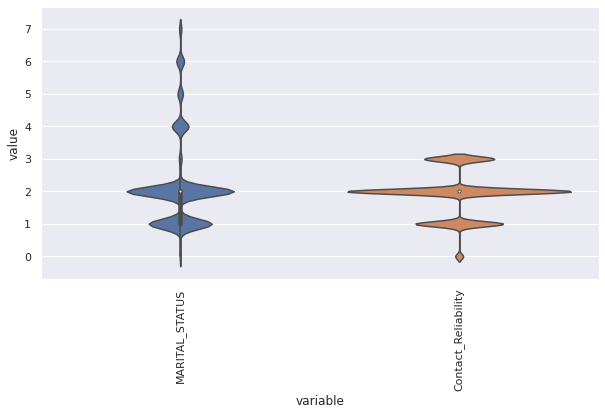

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value',  data=pd.melt(bankcredit_data.iloc[:, np.r_[1,31:32]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

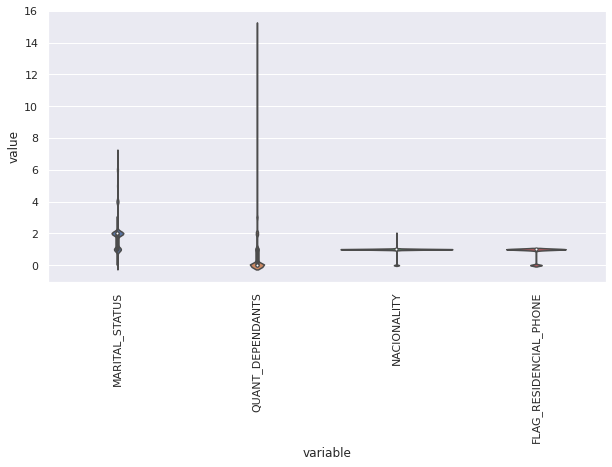

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value',  data=pd.melt(bankcredit_data.iloc[:, np.r_[1,1:5]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [ ]:
# sns.catplot(x="RESIDENCIAL_ZIP_3", y="TARGET",
#             kind="violin", data=bankcredit_data)

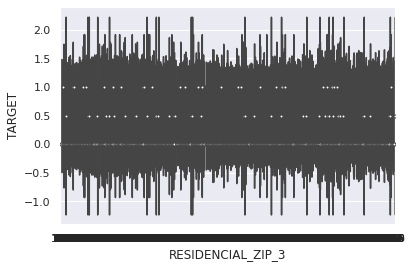

In [ ]:
ax = sns.violinplot(x="RESIDENCIAL_ZIP_3", y="TARGET", data=bankcredit_data)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

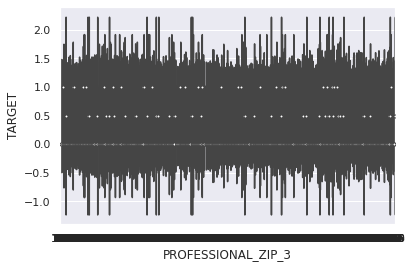

In [ ]:
ax = sns.violinplot(x="PROFESSIONAL_ZIP_3", y="TARGET", data=bankcredit_data)


In [ ]:
# sns.set_theme(style="whitegrid")
# # ax = sns.violinplot(x=tips["total_bill"])
# ax = sns.violinplot(x=bankcredit_data["PROFESSIONAL_ZIP_3"])

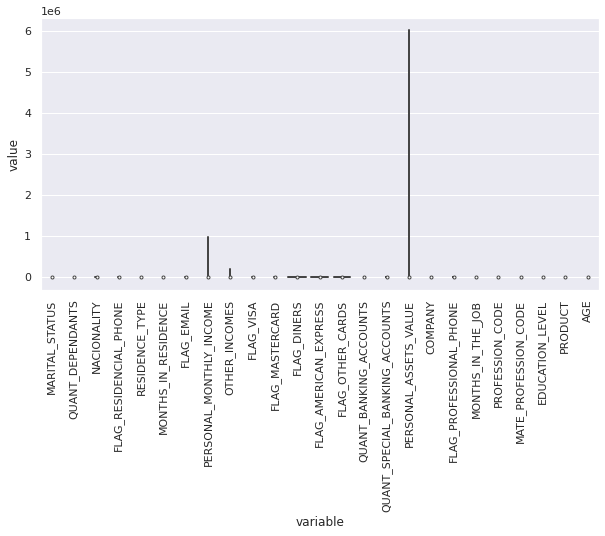

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value',  data=pd.melt(bankcredit_data.iloc[:, np.r_[1,1:26]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [ ]:
bankcredit_data.describe()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
count,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,4.950600e+04,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.000000,49506.00000,4.950600e+04,49506.000000,49506.000000
mean,1.006605,2.142367,0.652143,0.961479,0.838706,1.245001,9.397164,0.802610,889.768436,35.514705,0.111986,0.098311,0.001333,0.001757,0.002060,0.357654,0.357654,2.325276e+03,0.443280,0.272088,0.009413,8.207288,13.165232,13.045065,1.276027,42.894235,585.157132,585.157132,0.26013,2.316209e+03,0.215449,1.913404
std,0.081005,1.321018,1.168801,0.202277,0.367805,0.856110,10.211975,0.398033,7885.519452,895.860759,0.315353,0.297738,0.036489,0.041884,0.045345,0.479904,0.479904,4.255160e+04,0.496777,0.445040,0.385360,2.977602,8.686429,9.432981,0.989217,14.508154,228.063101,228.063101,0.43871,2.075706e+04,0.524484,0.690943
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,0.00000,1.818182e+01,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,361.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,31.000000,450.000000,450.000000,0.00000,3.000000e+02,0.000000,2.000000
50%,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,20.000000,20.000000,1.000000,41.000000,600.000000,600.000000,0.00000,4.150000e+02,0.000000,2.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,9.000000,20.000000,20.000000,1.000000,53.000000,738.000000,738.000000,1.00000,7.390000e+02,0.000000,2.000000
max,2.000000,7.000000,15.000000,2.000000,1.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,1.000000,35.000000,18.000000,20.000000,20.000000,7.000000,80.000000,999.000000,999.000000,1.00000,3.000272e+06,4.000000,3.000000


---
Analysing Correlation

---


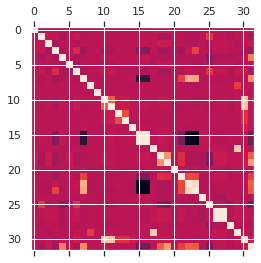

In [ ]:
plt.matshow(bankcredit_data.corr())
plt.show()



We will now save the output to a compressed format which is very efficient to start whole data structures, [pickle](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html).

In [ ]:
bankcredit_data.to_pickle('BankCreditClean.pkl')

##-----------------------------------------------------------------------------------------------------





In [ ]:
# df = bankcredit_data.drop(['RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'], axis = 1)


In [ ]:
# df = bankcredit_data.astype("category")
# df.dtypes

## WoE



In [ ]:
# bankcredit_data.to_excel("P1.xlsx")  

# Weight of Evidence Transformation

In this lab we will apply a Weight of Evidence transformation to our data. The idea is to:

- Split the data into a train/test set.
- Generate a relevant set of cuts to our data.
- Calculate the WoE for each variable.
- Save the data we just created.

We are assuming we have already cleaned the date of outliers and null values.

In order to do this we will use the fantastic  [```scorecardpy```](https://github.com/ShichenXie/scorecardpy) Python package. First we need to install it, as it is not a standard package.

We use the OS python software ```pip``` for this.

In [ ]:
bankcredit_data = pd.read_pickle('BankCreditClean.pkl')
# bankcredit_data.describe()

## Binning

The first step is to properly bin the data. Usually, we will run a tree and manually adjust those cases that do not follow a logical pattern.

However, as calculating WoE means we need to use the objective variable, we need to first create a train and test split. The scorecard package comes with a function to do so easily,  ```split_df```, which takes as an argument the ratio and the seed.


In [ ]:
# X = bankcredit_data.drop("TARGET", axis = 1)
# y = bankcredit_data['TARGET']

In [ ]:
bankcredit_data.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,NACIONALITY,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,COMPANY,FLAG_PROFESSIONAL_PHONE,MONTHS_IN_THE_JOB,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
0,1,6,1.0,1,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,0,0,9.0,20.0,20.0,1,32,595,595,1,450.0,2,2
1,1,2,0.0,1,1,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,1,0,0,11.0,11.0,20.0,1,34,230,230,1,750.0,0,2
2,1,2,0.0,1,1,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,11.0,20.0,20.0,1,27,591,591,0,500.0,0,2
3,1,2,0.0,1,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,20.0,20.0,1,61,545,545,0,500.0,0,1
4,1,2,0.0,1,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,9.0,20.0,20.0,1,48,235,235,1,1200.0,0,2


In [ ]:
bankcredit_data = bankcredit_data.drop(['NACIONALITY'], axis = 1)

In [ ]:
#Removing as IV = 0
bankcredit_data = bankcredit_data.drop(['MONTHS_IN_THE_JOB','FLAG_DINERS','FLAG_AMERICAN_EXPRESS','FLAG_OTHER_CARDS','PERSONAL_ASSETS_VALUE'], axis = 1)


In [ ]:
bankcredit_data.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
0,1,6,1.0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,9.0,20.0,20.0,1,32,595,595,1,450.0,2,2
1,1,2,0.0,1,1.0,1.0,1,750.0,0.0,0,0,0,0,1,0,11.0,11.0,20.0,1,34,230,230,1,750.0,0,2
2,1,2,0.0,1,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,11.0,20.0,20.0,1,27,591,591,0,500.0,0,2
3,1,2,0.0,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,61,545,545,0,500.0,0,1
4,1,2,0.0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,48,235,235,1,1200.0,0,2


In [ ]:
train, test = sc.split_df(bankcredit_data.iloc[:,1:],
                          y = 'TARGET',
                          ratio = 0.7,
                          seed = 251139213).values()

In [ ]:
test.describe()

,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
count,14851.000000,14851.000000,14851.00000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.00000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000,14851.000000
mean,2.145175,0.643795,0.83725,1.241735,9.494041,0.803380,1013.330094,31.066094,0.113056,0.100061,0.359774,0.359774,0.441788,0.266716,8.195071,13.149283,13.000741,1.26207,42.904586,584.683186,584.683186,0.260117,2372.082899,0.217561,1.907346
std,1.327234,1.174925,0.36915,0.848138,10.369316,0.397456,11739.835228,175.609956,0.316672,0.300091,0.480371,0.480371,0.496617,0.442258,3.010597,8.702738,9.443260,0.95424,14.504577,229.513055,229.513055,0.438713,15796.260327,0.525579,0.684829
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,18.000000,110.000000,110.000000,0.000000,18.181818,0.000000,0.000000
25%,1.000000,0.000000,1.00000,1.000000,2.000000,1.000000,361.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.00000,32.000000,449.000000,449.000000,0.000000,300.000000,0.000000,2.000000
50%,2.000000,0.000000,1.00000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,20.000000,20.000000,1.00000,41.000000,600.000000,600.000000,0.000000,419.000000,0.000000,2.000000
75%,2.000000,1.000000,1.00000,1.000000,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000,20.000000,20.000000,1.00000,53.000000,746.000000,746.000000,1.000000,750.000000,0.000000,2.000000
max,7.000000,14.000000,1.00000,5.000000,228.000000,1.000000,959000.000000,5400.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,17.000000,20.000000,20.000000,7.00000,80.000000,999.000000,999.000000,1.000000,959000.000000,4.000000,3.000000


In [ ]:
train.describe()

,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
count,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,3.465500e+04,34655.000000,34655.000000
mean,2.141163,0.655721,0.839331,1.246400,9.355649,0.802280,836.817515,37.421106,0.111528,0.097562,0.356745,0.356745,0.443919,0.274390,8.212523,13.172068,13.064060,1.282008,42.889799,585.360237,585.360237,0.260136,2.292264e+03,0.214543,1.916001
std,1.318363,1.166165,0.367231,0.859511,10.143669,0.398286,5455.224275,1064.556145,0.314789,0.296725,0.479708,0.479708,0.496852,0.446213,2.963377,8.679547,9.428645,1.003787,14.509894,227.441932,227.441932,0.438715,2.255153e+04,0.524020,0.693540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000,1.864286e+01,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,361.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,1.000000,31.000000,450.000000,450.000000,0.000000,3.000000e+02,0.000000,2.000000
50%,2.000000,0.000000,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,20.000000,20.000000,1.000000,41.000000,600.000000,600.000000,0.000000,4.130000e+02,0.000000,2.000000
75%,2.000000,1.000000,1.000000,1.000000,14.000000,1.000000,800.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,9.000000,20.000000,20.000000,1.000000,53.000000,730.000000,730.000000,1.000000,7.300000e+02,0.000000,2.000000
max,7.000000,15.000000,1.000000,5.000000,200.000000,1.000000,668000.000000,194344.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,18.000000,20.000000,20.000000,7.000000,80.000000,999.000000,999.000000,1.000000,3.000272e+06,4.000000,3.000000


In [ ]:
bins = sc.woebin(train, y = 'TARGET', 
                 min_perc_fine_bin=0.01, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.001, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 34655 rows and 25 columns in 00:00:38


In [ ]:
# 1- with 5 bins Age 0.082
# 2 - 8 bins Age 0.0842
# 3 - 12 bins - better IV value but trend wasn't as expected
# 4 - 10 bins - same as 12

Visualizing trends and bins adjustment 

/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:1203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To co

{'AGE': <Figure size 432x288 with 2 Axes>,
 'COMPANY': <Figure size 432x288 with 2 Axes>,
 'Contact_Reliability': <Figure size 432x288 with 2 Axes>,
 'EDUCATION_LEVEL': <Figure size 432x288 with 2 Axes>,
 'FLAG_EMAIL': <Figure size 432x288 with 2 Axes>,
 'FLAG_MASTERCARD': <Figure size 432x288 with 2 Axes>,
 'FLAG_PROFESSIONAL_PHONE': <Figure size 432x288 with 2 Axes>,
 'FLAG_RESIDENCIAL_PHONE': <Figure size 432x288 with 2 Axes>,
 'FLAG_VISA': <Figure size 432x288 with 2 Axes>,
 'MARITAL_STATUS': <Figure size 432x288 with 2 Axes>,
 'MATE_PROFESSION_CODE': <Figure size 432x288 with 2 Axes>,
 'MONTHS_IN_RESIDENCE': <Figure size 432x288 with 2 Axes>,
 'OTHER_INCOMES': <Figure size 432x288 with 2 Axes>,
 'PERSONAL_MONTHLY_INCOME': <Figure size 432x288 with 2 Axes>,
 'PRODUCT': <Figure size 432x288 with 2 Axes>,
 'PROFESSIONAL_ZIP_3': <Figure size 432x288 with 2 Axes>,
 'PROFESSION_CODE': <Figure size 432x288 with 2 Axes>,
 'QUANT_BANKING_ACCOUNTS': <Figure size 432x288 with 2 Axes>,
 'QUAN

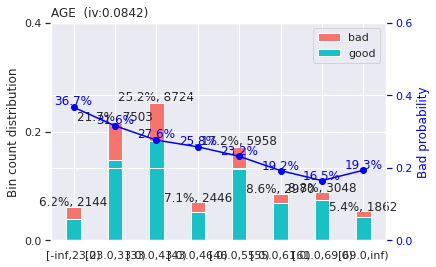

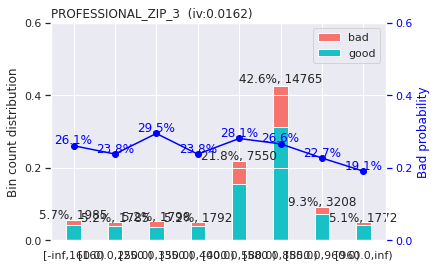

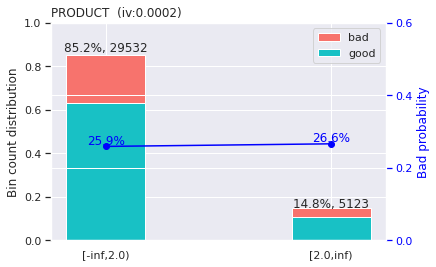

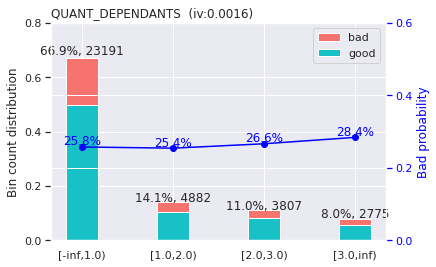

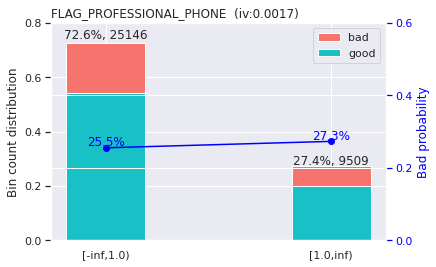

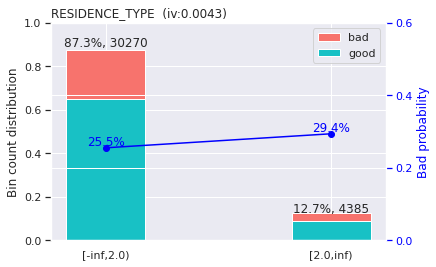

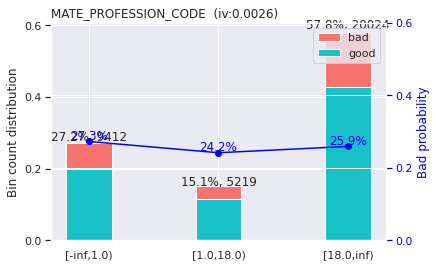

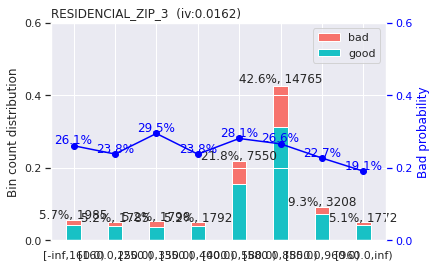

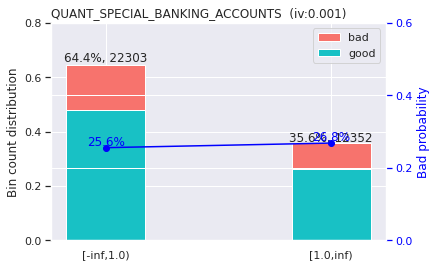

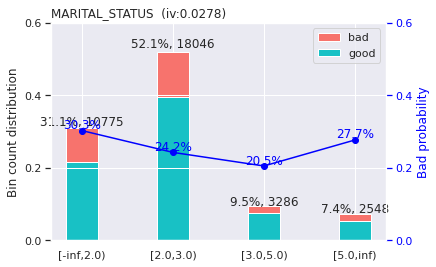

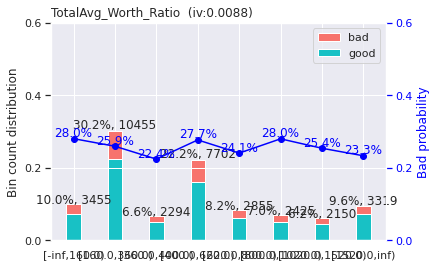

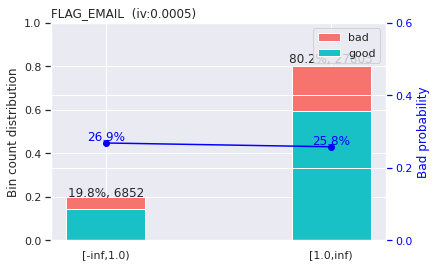

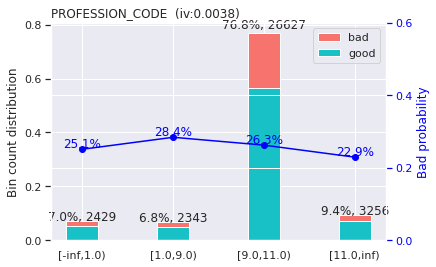

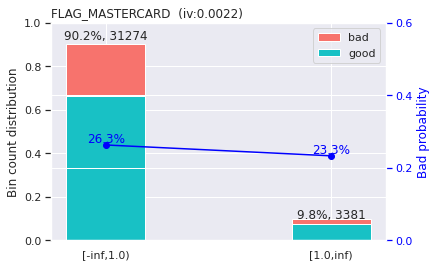

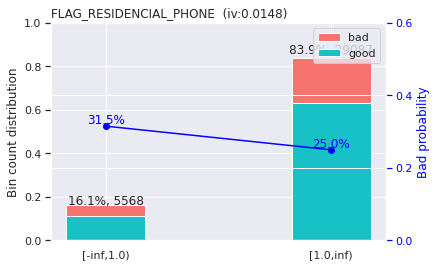

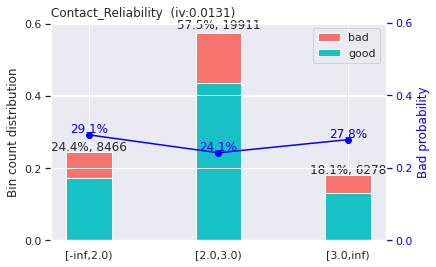

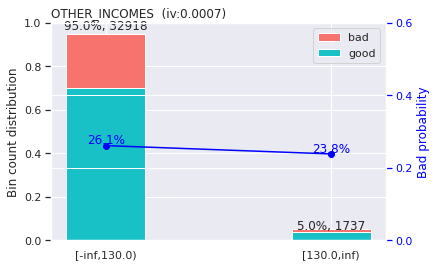

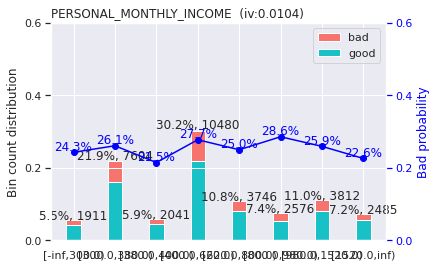

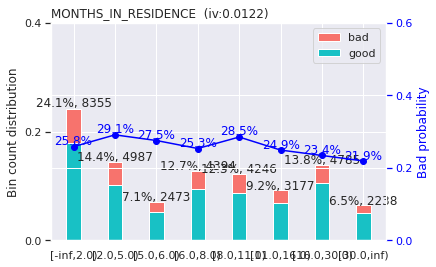

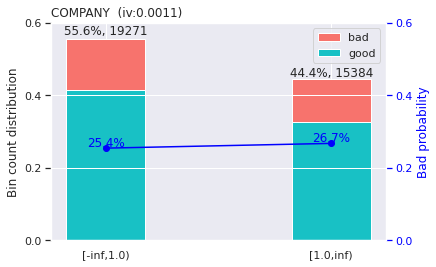

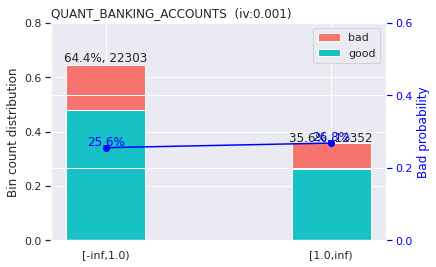

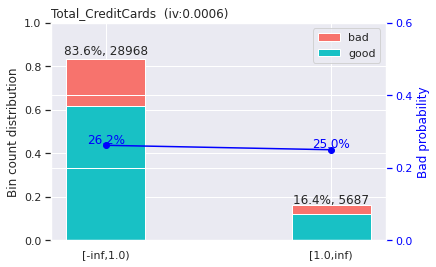

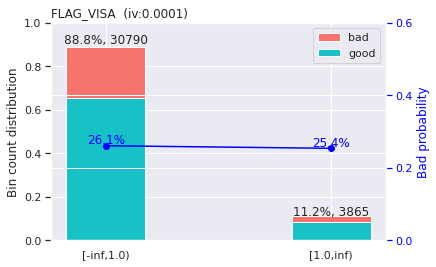

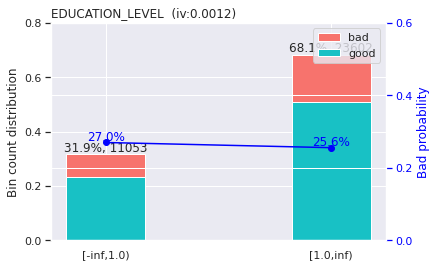

In [ ]:
sc.woebin_plot(bins)

In [ ]:
bins

{'AGE':   variable          bin  count  ...  total_iv  breaks  is_special_values
 0      AGE  [-inf,23.0)   2144  ...  0.084248    23.0              False
 1      AGE  [23.0,33.0)   7503  ...  0.084248    33.0              False
 2      AGE  [33.0,43.0)   8724  ...  0.084248    43.0              False
 3      AGE  [43.0,46.0)   2446  ...  0.084248    46.0              False
 4      AGE  [46.0,55.0)   5958  ...  0.084248    55.0              False
 5      AGE  [55.0,61.0)   2970  ...  0.084248    61.0              False
 6      AGE  [61.0,69.0)   3048  ...  0.084248    69.0              False
 7      AGE   [69.0,inf)   1862  ...  0.084248     inf              False
 
 [8 rows x 12 columns],
 'COMPANY':   variable         bin  count  ...  total_iv  breaks  is_special_values
 0  COMPANY  [-inf,1.0)  19271  ...  0.001142     1.0              False
 1  COMPANY   [1.0,inf)  15384  ...  0.001142     inf              False
 
 [2 rows x 12 columns],
 'Contact_Reliability':               variabl

Manual Adjustment

In [ ]:
# breaks_adj = sc.woebin_adj(train, "TARGET", bins, adj_all_var = True)

In [ ]:
# breaks_adj

In [ ]:
breaks_adj = {'AGE': [23.0,33.0,43.0,46.0,55.0,61.0,69.0], 'COMPANY': [1.0], 'Contact_Reliability': [2.0,3.0], 
              'EDUCATION_LEVEL': [1.0], 'FLAG_EMAIL': [1.0], 'FLAG_MASTERCARD': [1.0], 'FLAG_PROFESSIONAL_PHONE': [1.0], 
              'FLAG_RESIDENCIAL_PHONE': [1.0], 'FLAG_VISA': [1.0], 'MARITAL_STATUS': [2.0,3.0,5.0], 'MATE_PROFESSION_CODE': [1.0,18.0],
              'MONTHS_IN_RESIDENCE': [6.0,16.0,30.0 ], 'OTHER_INCOMES': [130.0], 'PERSONAL_MONTHLY_INCOME': [1700.0], 'PRODUCT': [2.0],
              'PROFESSIONAL_ZIP_3': [160.0,250.0,350.0,400.0,580.0,850.0,960.0], 'PROFESSION_CODE': [1.0,9.0,11.0], 
              'QUANT_BANKING_ACCOUNTS': [1.0], 'QUANT_DEPENDANTS': [1.0,2.0,3.0], 'QUANT_SPECIAL_BANKING_ACCOUNTS': [1.0], 
              'RESIDENCE_TYPE': [2.0], 'RESIDENCIAL_ZIP_3': [160.0,250.0,350.0,400.0,580.0,850.0,960.0], 
              'TotalAvg_Worth_Ratio': [160.0, 260.0, 320.0], 'Total_CreditCards': [1.0]}

In [ ]:
bins_adj = sc.woebin(train, y="TARGET", breaks_list=breaks_adj) # Apply new cuts
train_woe = sc.woebin_ply(train, bins_adj) # Calculate WoE dataset (train)
test_woe = sc.woebin_ply(test, bins_adj) # Calculate WoE dataset (test)

[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [ ]:
train_woe.head()

,TARGET,PROFESSIONAL_ZIP_3_woe,PRODUCT_woe,FLAG_PROFESSIONAL_PHONE_woe,RESIDENCIAL_ZIP_3_woe,QUANT_SPECIAL_BANKING_ACCOUNTS_woe,FLAG_EMAIL_woe,FLAG_RESIDENCIAL_PHONE_woe,Contact_Reliability_woe,MONTHS_IN_RESIDENCE_woe,QUANT_BANKING_ACCOUNTS_woe,MARITAL_STATUS_woe,TotalAvg_Worth_Ratio_woe,FLAG_VISA_woe,Total_CreditCards_woe,AGE_woe,QUANT_DEPENDANTS_woe,RESIDENCE_TYPE_woe,PROFESSION_CODE_woe,FLAG_MASTERCARD_woe,OTHER_INCOMES_woe,PERSONAL_MONTHLY_INCOME_woe,COMPANY_woe,MATE_PROFESSION_CODE_woe,EDUCATION_LEVEL_woe
0,1,0.030775,-0.005519,-0.02544,0.030775,-0.023618,-0.010783,-0.055321,-0.099348,0.017504,-0.023618,0.084312,-0.019971,-0.033097,-0.054052,0.273697,-0.031077,-0.025614,0.012717,-0.145809,0.005967,0.010946,-0.030440,-0.005445,-0.02385
1,1,-0.117887,-0.005519,-0.02544,-0.117887,-0.023618,-0.010783,-0.055321,-0.099348,0.057352,-0.023618,-0.093805,-0.019971,0.004117,0.010447,0.082694,-0.013668,-0.025614,-0.166311,0.015150,0.005967,0.010946,0.037515,-0.098570,-0.02385
3,0,0.105396,-0.005519,-0.02544,0.105396,-0.023618,-0.010783,0.268484,0.154385,0.017504,-0.023618,-0.093805,-0.019971,0.004117,0.010447,-0.578415,-0.013668,-0.025614,0.012717,0.015150,0.005967,0.010946,-0.030440,-0.005445,-0.02385
4,1,-0.117887,-0.005519,-0.02544,-0.117887,-0.023618,-0.010783,-0.055321,-0.099348,0.017504,-0.023618,-0.093805,-0.019971,0.004117,0.010447,-0.152972,-0.013668,-0.025614,0.012717,0.015150,0.005967,0.010946,-0.030440,-0.005445,-0.02385
5,1,-0.119939,0.031532,-0.02544,-0.119939,0.041982,-0.010783,-0.055321,-0.099348,0.057352,0.041982,-0.093805,-0.019971,0.004117,0.010447,0.082694,-0.013668,-0.025614,0.012717,0.015150,0.005967,0.010946,0.037515,0.063948,0.05004


##IV Filtering value


Now we can check the information value of our variables and remove those who are not predictive. We use the function ```iv```. In general:

- $IV < 0.02$: No predictive ability, remove.
- $0.02 \le IV < 0.1$: Small predictive ability, suggest to remove.
- $0.1 \le IV < 0.3$: Medium predictive ability, leave.
- $0.3 \le IV < 1$: Good predictive ability, leave.
- $1 \le IV $: Strong predictive ability. Suspicious variable. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [ ]:
sc.iv(train_woe, 'TARGET')

,variable,info_value
15,AGE_woe,0.084248
7,MARITAL_STATUS_woe,0.027794
0,RESIDENCIAL_ZIP_3_woe,0.016175
8,PROFESSIONAL_ZIP_3_woe,0.016175
12,FLAG_RESIDENCIAL_PHONE_woe,0.014834
19,Contact_Reliability_woe,0.013062
6,MONTHS_IN_RESIDENCE_woe,0.007381
23,RESIDENCE_TYPE_woe,0.004328
2,PROFESSION_CODE_woe,0.003805
10,MATE_PROFESSION_CODE_woe,0.002573


In [ ]:
train_woe.columns

Index(['TARGET', 'PROFESSIONAL_ZIP_3_woe', 'PRODUCT_woe',
       'FLAG_PROFESSIONAL_PHONE_woe', 'RESIDENCIAL_ZIP_3_woe',
       'QUANT_SPECIAL_BANKING_ACCOUNTS_woe', 'FLAG_EMAIL_woe',
       'FLAG_RESIDENCIAL_PHONE_woe', 'Contact_Reliability_woe',
       'MONTHS_IN_RESIDENCE_woe', 'QUANT_BANKING_ACCOUNTS_woe',
       'MARITAL_STATUS_woe', 'TotalAvg_Worth_Ratio_woe', 'FLAG_VISA_woe',
       'Total_CreditCards_woe', 'AGE_woe', 'QUANT_DEPENDANTS_woe',
       'RESIDENCE_TYPE_woe', 'PROFESSION_CODE_woe', 'FLAG_MASTERCARD_woe',
       'OTHER_INCOMES_woe', 'PERSONAL_MONTHLY_INCOME_woe', 'COMPANY_woe',
       'MATE_PROFESSION_CODE_woe', 'EDUCATION_LEVEL_woe'],
      dtype='object')

In [ ]:
# accepted_range = np.r_[0:3,4:10] # Note the last in each subrange is not used
# train_woe = train_woe.iloc[:, accepted_range]
# test_woe = test_woe.iloc[:, accepted_range]
# train_woe.head()


In [ ]:
test_woe.head()

,TARGET,PROFESSIONAL_ZIP_3_woe,PRODUCT_woe,FLAG_PROFESSIONAL_PHONE_woe,RESIDENCIAL_ZIP_3_woe,QUANT_SPECIAL_BANKING_ACCOUNTS_woe,FLAG_EMAIL_woe,FLAG_RESIDENCIAL_PHONE_woe,Contact_Reliability_woe,MONTHS_IN_RESIDENCE_woe,QUANT_BANKING_ACCOUNTS_woe,MARITAL_STATUS_woe,TotalAvg_Worth_Ratio_woe,FLAG_VISA_woe,Total_CreditCards_woe,AGE_woe,QUANT_DEPENDANTS_woe,RESIDENCE_TYPE_woe,PROFESSION_CODE_woe,FLAG_MASTERCARD_woe,OTHER_INCOMES_woe,PERSONAL_MONTHLY_INCOME_woe,COMPANY_woe,MATE_PROFESSION_CODE_woe,EDUCATION_LEVEL_woe
2,0,0.030775,-0.005519,-0.025440,0.030775,-0.023618,-0.010783,-0.055321,-0.099348,0.017504,-0.023618,-0.093805,-0.019971,0.004117,0.010447,0.273697,-0.013668,-0.025614,-0.166311,0.015150,0.005967,0.010946,-0.030440,-0.005445,-0.02385
8,0,-0.117887,0.031532,-0.025440,-0.117887,0.041982,-0.010783,-0.055321,-0.099348,0.057352,0.041982,0.210090,-0.019971,0.004117,0.010447,0.273697,-0.013668,-0.025614,-0.047319,0.015150,0.005967,0.010946,0.037515,0.063948,0.05004
9,0,-0.180449,-0.005519,0.065832,-0.180449,0.041982,-0.010783,-0.055321,0.089841,0.057352,0.041982,0.210090,-0.019971,-0.033097,-0.054052,0.082694,-0.013668,-0.025614,0.012717,-0.145809,0.005967,0.010946,0.037515,-0.098570,0.05004
12,0,-0.119939,-0.005519,-0.025440,-0.119939,-0.023618,-0.010783,-0.055321,-0.099348,0.057352,-0.023618,0.210090,0.039175,0.004117,0.010447,0.082694,-0.031077,-0.025614,0.012717,0.015150,0.005967,0.010946,-0.030440,-0.005445,-0.02385
15,0,0.030775,-0.005519,0.065832,0.030775,-0.023618,-0.010783,0.268484,-0.099348,-0.140236,-0.023618,-0.093805,-0.011703,0.004117,-0.054052,-0.152972,-0.031077,-0.025614,0.121792,-0.145809,0.005967,0.010946,0.037515,-0.005445,-0.02385


Now the data should look much better.

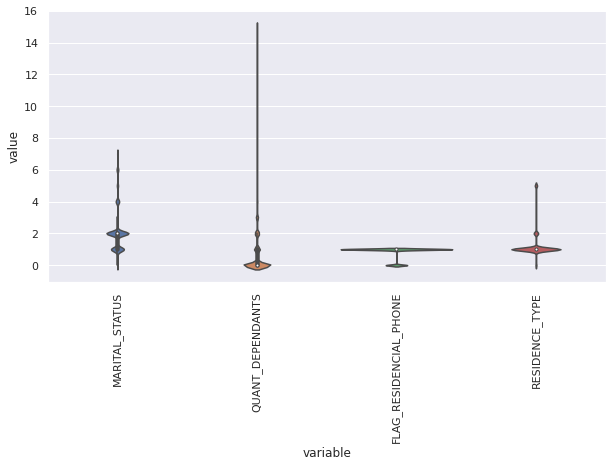

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(bankcredit_data.iloc[:, np.r_[1,1:5]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

Saving the results

In [ ]:
train_woe.to_csv("train_woe.csv", index = False)
test_woe.to_csv("test_woe.csv", index = False)
bankcredit_data.to_pickle('BankcreditCleanNewVars.pkl')

In [ ]:
from google.colab import files
files.download("train_woe.csv")
files.download("test_woe.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Logistic Regression and Scorecards


In [ ]:
bankcredit_train_WoE = pd.read_csv('train_woe.csv')
bankcredit_test_WoE = pd.read_csv('test_woe.csv')
bankcredit_data = pd.read_pickle('BankcreditCleanNewVars.pkl')

In [ ]:
bankcredit_train_noWoE, bankcredit_test_noWoE = sc.split_df(bankcredit_data.iloc[:,1:],
                          y = 'TARGET',
                          ratio = 0.7,
                          seed = 251139213).values()

In [ ]:

# Give breaks for WoE
breaks_adj = {'AGE': [23.0,33.0,43.0,46.0,55.0,61.0,69.0], 'COMPANY': [1.0], 'Contact_Reliability': [2.0,3.0], 'EDUCATION_LEVEL': [1.0], 'FLAG_EMAIL': [1.0], 'FLAG_MASTERCARD': [1.0], 'FLAG_PROFESSIONAL_PHONE': [1.0], 'FLAG_RESIDENCIAL_PHONE': [1.0], 'FLAG_VISA': [1.0], 'MARITAL_STATUS': [2.0,3.0,5.0], 'MATE_PROFESSION_CODE': [1.0,18.0], 'MONTHS_IN_RESIDENCE': [6.0,16.0,30.0 ], 'OTHER_INCOMES': [130.0], 'PERSONAL_MONTHLY_INCOME': [1700.0], 'PRODUCT': [2.0], 'PROFESSIONAL_ZIP_3': [160.0,250.0,350.0,400.0,580.0,850.0,960.0], 'PROFESSION_CODE': [1.0,9.0,11.0], 'QUANT_BANKING_ACCOUNTS': [1.0], 'QUANT_DEPENDANTS': [1.0,2.0,3.0], 'QUANT_SPECIAL_BANKING_ACCOUNTS': [1.0], 'RESIDENCE_TYPE': [2.0], 'RESIDENCIAL_ZIP_3': [160.0,250.0,350.0,400.0,580.0,850.0,960.0], 'TotalAvg_Worth_Ratio': [160.0, 260.0, 320.0], 'Total_CreditCards': [1.0]}
# Apply breaks.
bins_adj = sc.woebin(bankcredit_train_noWoE, y="TARGET",
                     breaks_list=breaks_adj)
  

[INFO] creating woe binning ...


Correlation Analysis

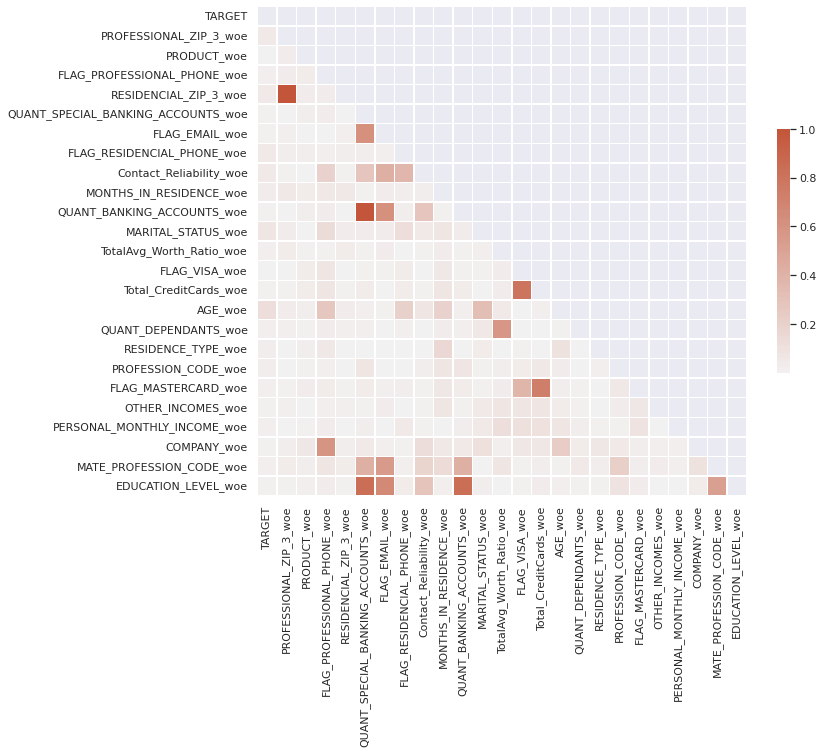

In [ ]:
# Compute the correlation matrix
corr = bankcredit_train_WoE.corr()
corr = np.abs(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr

,TARGET,PROFESSIONAL_ZIP_3_woe,PRODUCT_woe,FLAG_PROFESSIONAL_PHONE_woe,RESIDENCIAL_ZIP_3_woe,QUANT_SPECIAL_BANKING_ACCOUNTS_woe,FLAG_EMAIL_woe,FLAG_RESIDENCIAL_PHONE_woe,Contact_Reliability_woe,MONTHS_IN_RESIDENCE_woe,QUANT_BANKING_ACCOUNTS_woe,MARITAL_STATUS_woe,TotalAvg_Worth_Ratio_woe,FLAG_VISA_woe,Total_CreditCards_woe,AGE_woe,QUANT_DEPENDANTS_woe,RESIDENCE_TYPE_woe,PROFESSION_CODE_woe,FLAG_MASTERCARD_woe,OTHER_INCOMES_woe,PERSONAL_MONTHLY_INCOME_woe,COMPANY_woe,MATE_PROFESSION_CODE_woe,EDUCATION_LEVEL_woe
TARGET,1.000000,0.054406,0.005805,0.018038,0.054406,0.013844,0.009504,0.054730,0.050363,0.037063,0.013844,0.073053,0.017482,0.005103,0.010370,0.125028,0.017549,0.029342,0.026792,0.020287,0.011411,0.019266,0.014837,0.022177,0.015202
PROFESSIONAL_ZIP_3_woe,0.054406,1.000000,0.036942,0.032035,1.000000,0.006408,0.019860,0.028986,0.015175,0.056837,0.006408,0.038323,0.044862,0.005854,0.009430,0.035323,0.020847,0.004709,0.006963,0.010831,0.017395,0.006641,0.027612,0.043387,0.010150
PRODUCT_woe,0.005805,0.036942,1.000000,0.041852,0.036942,0.025975,0.004679,0.026985,0.000642,0.040705,0.025975,0.005538,0.009557,0.042191,0.046251,0.026925,0.008875,0.028312,0.010990,0.034471,0.002526,0.014215,0.063358,0.030605,0.020244
FLAG_PROFESSIONAL_PHONE_woe,0.018038,0.032035,0.041852,1.000000,0.032035,0.035340,0.000629,0.019053,0.196505,0.057324,0.035340,0.138854,0.009086,0.079193,0.082509,0.266351,0.034841,0.058901,0.021776,0.039729,0.020564,0.038785,0.598446,0.075498,0.035544
RESIDENCIAL_ZIP_3_woe,0.054406,1.000000,0.036942,0.032035,1.000000,0.006408,0.019860,0.028986,0.015175,0.056837,0.006408,0.038323,0.044862,0.005854,0.009430,0.035323,0.020847,0.004709,0.006963,0.010831,0.017395,0.006641,0.027612,0.043387,0.010150
QUANT_SPECIAL_BANKING_ACCOUNTS_woe,0.013844,0.006408,0.025975,0.035340,0.006408,1.000000,0.620485,0.030777,0.289022,0.013586,1.000000,0.036810,0.012811,0.014050,0.039203,0.022645,0.016854,0.005425,0.071490,0.044857,0.012394,0.024323,0.050047,0.429399,0.841348
FLAG_EMAIL_woe,0.009504,0.019860,0.004679,0.000629,0.019860,0.620485,1.000000,0.017541,0.429375,0.033095,0.620485,0.035966,0.032075,0.008329,0.005001,0.015070,0.004099,0.007846,0.002975,0.016728,0.033058,0.006085,0.018267,0.549750,0.668226
FLAG_RESIDENCIAL_PHONE_woe,0.054730,0.028986,0.026985,0.019053,0.028986,0.030777,0.017541,1.000000,0.369503,0.028022,0.030777,0.122386,0.003916,0.043931,0.040465,0.209597,0.019505,0.006508,0.001438,0.025217,0.003571,0.047533,0.008107,0.022497,0.042972
Contact_Reliability_woe,0.050363,0.015175,0.000642,0.196505,0.015175,0.289022,0.429375,0.369503,1.000000,0.025116,0.289022,0.050592,0.011303,0.004179,0.015297,0.076797,0.003470,0.003991,0.025641,0.013779,0.014853,0.011689,0.128197,0.195192,0.295631
MONTHS_IN_RESIDENCE_woe,0.037063,0.056837,0.040705,0.057324,0.056837,0.013586,0.033095,0.028022,0.025116,1.000000,0.013586,0.074290,0.036408,0.060819,0.077815,0.200568,0.032792,0.162646,0.085658,0.066158,0.070775,0.007622,0.060557,0.146063,0.018963


In [ ]:
# Compute the correlation matrix
corr = bankcredit_train_WoE.corr()
corr = np.abs(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True],


In [ ]:
bankcredit_train_WoE = bankcredit_train_WoE.drop(['QUANT_BANKING_ACCOUNTS_woe','PROFESSIONAL_ZIP_3_woe'], axis = 1)


In [ ]:
bankcredit_test_WoE = bankcredit_test_WoE.drop(['QUANT_BANKING_ACCOUNTS_woe','PROFESSIONAL_ZIP_3_woe'], axis = 1)


In [ ]:
# bankcredit_train_WoE = bankcredit_train_WoE.drop(['Total_CreditCards_woe'], axis = 1)
# bankcredit_test_WoE = bankcredit_test_WoE.drop(['Total_CreditCards_woe'], axis = 1)


In [ ]:
# bankcredit_train_WoE = bankcredit_train_WoE.drop(['FLAG_EMAIL_woe','FLAG_VISA_woe', 'PRODUCT_woe', 'FLAG_PROFESSIONAL_PHONE_woe', 'COMPANY_woe'], axis = 1)
# bankcredit_test_WoE = bankcredit_test_WoE.drop(['FLAG_EMAIL_woe','FLAG_VISA_woe', 'PRODUCT_woe', 'FLAG_PROFESSIONAL_PHONE_woe', 'COMPANY_woe'], axis = 1)


## Generating a logistic regression object

To train a logistic regression, we first need to create an object that stores how we want the model to be trained. In general:

- We create the model we want to train, with all required parameters. This model is **not trained yet**, it just keeps the logic we will use.

- We apply the ```fit``` function to the object we just created. This takes as input the training set and the targets (if the model is supervised), and will update our model with trained parameters.

- We then used our trained model to apply it to a test set, and calculate outputs. 

In a nutshell, LASSO and Ridge are going to penalize including variables by adding either a linear (LASSO) or quadratic (Ridge) term to the minimization algorithm, or a combination of the two if using Elastic Net. 

These methods have hypermparameters that need to be optimized. For this we will use a cross-validation procedure.



In [ ]:
from sklearn.linear_model import LogisticRegressionCV

bankcredit_logreg = LogisticRegressionCV(penalty='l2', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                                     tol=0.000001, # Tolerance for parameters
                                     cv = 3,     # How many CV folds to try. 3 or 5 should be enough.
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=251139213, # Random seed
                                     max_iter=100, # Maximum iterations
                                     verbose=2, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 2,      # Processes to use. Set to number of physical cores. 
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                    #  l1_ratios = np.arange(0, 0.2, 0.01), # The LASSO / Ridge ratios.
                                    )

In [ ]:
bankcredit_train_WoE.head()

,TARGET,PRODUCT_woe,FLAG_PROFESSIONAL_PHONE_woe,RESIDENCIAL_ZIP_3_woe,QUANT_SPECIAL_BANKING_ACCOUNTS_woe,FLAG_EMAIL_woe,FLAG_RESIDENCIAL_PHONE_woe,Contact_Reliability_woe,MONTHS_IN_RESIDENCE_woe,MARITAL_STATUS_woe,TotalAvg_Worth_Ratio_woe,FLAG_VISA_woe,Total_CreditCards_woe,AGE_woe,QUANT_DEPENDANTS_woe,RESIDENCE_TYPE_woe,PROFESSION_CODE_woe,FLAG_MASTERCARD_woe,OTHER_INCOMES_woe,PERSONAL_MONTHLY_INCOME_woe,COMPANY_woe,MATE_PROFESSION_CODE_woe,EDUCATION_LEVEL_woe
0,1,-0.005519,-0.02544,0.030775,-0.023618,-0.010783,-0.055321,-0.099348,0.017504,0.084312,-0.019971,-0.033097,-0.054052,0.273697,-0.031077,-0.025614,0.012717,-0.145809,0.005967,0.010946,-0.030440,-0.005445,-0.02385
1,1,-0.005519,-0.02544,-0.117887,-0.023618,-0.010783,-0.055321,-0.099348,0.057352,-0.093805,-0.019971,0.004117,0.010447,0.082694,-0.013668,-0.025614,-0.166311,0.015150,0.005967,0.010946,0.037515,-0.098570,-0.02385
2,0,-0.005519,-0.02544,0.105396,-0.023618,-0.010783,0.268484,0.154385,0.017504,-0.093805,-0.019971,0.004117,0.010447,-0.578415,-0.013668,-0.025614,0.012717,0.015150,0.005967,0.010946,-0.030440,-0.005445,-0.02385
3,1,-0.005519,-0.02544,-0.117887,-0.023618,-0.010783,-0.055321,-0.099348,0.017504,-0.093805,-0.019971,0.004117,0.010447,-0.152972,-0.013668,-0.025614,0.012717,0.015150,0.005967,0.010946,-0.030440,-0.005445,-0.02385
4,1,0.031532,-0.02544,-0.119939,0.041982,-0.010783,-0.055321,-0.099348,0.057352,-0.093805,-0.019971,0.004117,0.010447,0.082694,-0.013668,-0.025614,0.012717,0.015150,0.005967,0.010946,0.037515,0.063948,0.05004


In [ ]:
bankcredit_logreg.fit(X = bankcredit_train_WoE.iloc[:, 1:], # All rows and from the second var to end
                    y = bankcredit_train_WoE['TARGET'] # The target
                   )

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Streaming output truncated to the last 5000 lines.
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   16.9s finished


convergence after 33 epochs took 0 seconds


LogisticRegressionCV(class_weight='balanced', cv=3, n_jobs=2,
                     random_state=251139213, solver='saga', tol=1e-06,
                     verbose=2)

In [ ]:
coef_df = pd.concat([pd.DataFrame({'column': bankcredit_train_WoE.columns[1:]}), 
                    pd.DataFrame(np.transpose(bankcredit_logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,PRODUCT_woe,-0.353973
1,FLAG_PROFESSIONAL_PHONE_woe,-1.179376
2,RESIDENCIAL_ZIP_3_woe,0.967516
3,QUANT_SPECIAL_BANKING_ACCOUNTS_woe,0.358359
4,FLAG_EMAIL_woe,-1.015381
5,FLAG_RESIDENCIAL_PHONE_woe,1.536711
6,Contact_Reliability_woe,0.829350
7,MONTHS_IN_RESIDENCE_woe,0.304893
8,MARITAL_STATUS_woe,0.608452
9,TotalAvg_Worth_Ratio_woe,0.024965


In [ ]:
bankcredit_logreg.intercept_

array([-0.00145441])

Applying to test set

In [ ]:
pred_class_test = bankcredit_logreg.predict(bankcredit_test_WoE.iloc[:, 1:])
probs_test = bankcredit_logreg.predict_proba(bankcredit_test_WoE.iloc[:, 1:])
print(probs_test[0:5], pred_class_test[0:5])

[[0.49954105 0.50045895]
 [0.44942028 0.55057972]
 [0.55443497 0.44556503]
 [0.5083026  0.4916974 ]
 [0.53182515 0.46817485]] [1 1 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true = bankcredit_test_WoE['TARGET'], y_pred = pred_class_test)



array([[5926, 5062],
       [1509, 2354]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve


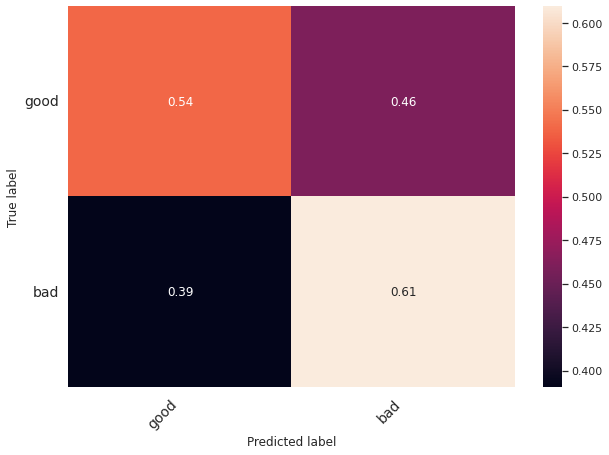

In [ ]:

# Calculate confusion matrix
confusion_matrix_lr = confusion_matrix(y_true = bankcredit_test_noWoE['TARGET'], 
                    y_pred = pred_class_test)

# Turn matrix to percentages
confusion_matrix_lr = confusion_matrix_lr.astype('float') / confusion_matrix_lr.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_lr, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

In [ ]:
# probs_test

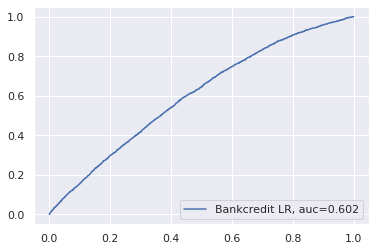

In [ ]:
fpr, tpr, thresholds = roc_curve(bankcredit_test_noWoE['TARGET'], probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankcredit_test_noWoE['TARGET'], 
                             y_score = probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Bankcredit LR, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##Scorecards

In [ ]:
bankcredit_sc = sc.scorecard(bins_adj,         # bins from the WoE
                           bankcredit_logreg,  # Trained logistic regression
                           bankcredit_train_WoE.columns[1:], # The column names in the trained LR
                           points0=1200, # Base points
                           odds0=0.1, # Base odds bads:goods
                           pdo=200
                           ) # PDO 


In [ ]:
bankcredit_sc

{'AGE':   variable          bin  points
 0      AGE  [-inf,23.0)  -160.0
 1      AGE  [23.0,33.0)   -88.0
 2      AGE  [33.0,43.0)   -26.0
 3      AGE  [43.0,46.0)     4.0
 4      AGE  [46.0,55.0)    49.0
 5      AGE  [55.0,61.0)   125.0
 6      AGE  [61.0,69.0)   185.0
 7      AGE   [69.0,inf)   123.0, 'COMPANY':    variable         bin  points
 68  COMPANY  [-inf,1.0)    -5.0
 69  COMPANY   [1.0,inf)     7.0, 'Contact_Reliability':                variable         bin  points
 57  Contact_Reliability  [-inf,2.0)   -37.0
 58  Contact_Reliability   [2.0,3.0)    24.0
 59  Contact_Reliability   [3.0,inf)   -21.0, 'EDUCATION_LEVEL':            variable         bin  points
 76  EDUCATION_LEVEL  [-inf,1.0)    -8.0
 77  EDUCATION_LEVEL   [1.0,inf)     4.0, 'FLAG_EMAIL':       variable         bin  points
 47  FLAG_EMAIL  [-inf,1.0)    13.0
 48  FLAG_EMAIL   [1.0,inf)    -3.0, 'FLAG_MASTERCARD':            variable         bin  points
 53  FLAG_MASTERCARD  [-inf,1.0)    -5.0
 54  FLAG_MASTERCA

In [ ]:
# Applying the credit score. Applies over the original data!
train_score = sc.scorecard_ply(bankcredit_train_noWoE, bankcredit_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(bankcredit_test_noWoE, bankcredit_sc, 
                               print_step=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
train_score.describe()

,score
count,34655.000000
mean,547.667552
std,123.531632
min,120.000000
25%,461.000000
50%,536.000000
75%,627.000000
max,1013.000000


In [ ]:

bankcredit_train_noWoE['score'] = train_score
bankcredit_test_noWoE['score'] = test_score

In [ ]:
bankcredit_train_noWoE.head()

,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability,score
0,6,1.0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,9.0,20.0,20.0,1,32,595,595,1,450.0,2,2,512.0
1,2,0.0,1,1.0,1.0,1,750.0,0.0,0,0,0,0,1,0,11.0,11.0,20.0,1,34,230,230,1,750.0,0,2,663.0
3,2,0.0,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,61,545,545,0,500.0,0,1,540.0
4,2,0.0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,48,235,235,1,1200.0,0,2,671.0
5,2,0.0,1,1.0,4.0,1,500.0,0.0,0,0,1,1,1,0,9.0,0.0,0.0,2,40,371,371,1,500.0,0,2,578.0


In [ ]:
bankcredit_test_noWoE.to_excel("P1.xlsx")  
bankcredit_train_noWoE.to_excel("P2.xlsx")  

##Random Forest

In [ ]:
bankcredit_data = pd.read_pickle('BankcreditCleanNewVars.pkl')


In [ ]:
bankcredit_data.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability
0,1,6,1.0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,9.0,20.0,20.0,1,32,595,595,1,450.0,2,2
1,1,2,0.0,1,1.0,1.0,1,750.0,0.0,0,0,0,0,1,0,11.0,11.0,20.0,1,34,230,230,1,750.0,0,2
2,1,2,0.0,1,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,11.0,20.0,20.0,1,27,591,591,0,500.0,0,2
3,1,2,0.0,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,61,545,545,0,500.0,0,1
4,1,2,0.0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,48,235,235,1,1200.0,0,2


In [ ]:
df1 = bankcredit_data.pop('TARGET')
bankcredit_data['TARGET']=df1

In [ ]:
bankcredit_data.head()

,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability,TARGET
0,1,6,1.0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,9.0,20.0,20.0,1,32,595,595,450.0,2,2,1
1,1,2,0.0,1,1.0,1.0,1,750.0,0.0,0,0,0,0,1,0,11.0,11.0,20.0,1,34,230,230,750.0,0,2,1
2,1,2,0.0,1,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,11.0,20.0,20.0,1,27,591,591,500.0,0,2,0
3,1,2,0.0,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,61,545,545,500.0,0,1,0
4,1,2,0.0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,9.0,20.0,20.0,1,48,235,235,1200.0,0,2,1


In [ ]:
df1 = bankcredit_data


In [ ]:
df1.dtypes

POSTAL_ADDRESS_TYPE                 int64
MARITAL_STATUS                      int64
QUANT_DEPENDANTS                  float64
FLAG_RESIDENCIAL_PHONE              int64
RESIDENCE_TYPE                    float64
MONTHS_IN_RESIDENCE               float64
FLAG_EMAIL                          int64
PERSONAL_MONTHLY_INCOME           float64
OTHER_INCOMES                     float64
FLAG_VISA                           int64
FLAG_MASTERCARD                     int64
QUANT_BANKING_ACCOUNTS              int64
QUANT_SPECIAL_BANKING_ACCOUNTS      int64
COMPANY                             int64
FLAG_PROFESSIONAL_PHONE             int64
PROFESSION_CODE                   float64
MATE_PROFESSION_CODE              float64
EDUCATION_LEVEL                   float64
PRODUCT                             int64
AGE                                 int64
RESIDENCIAL_ZIP_3                   Int64
PROFESSIONAL_ZIP_3                  Int64
TotalAvg_Worth_Ratio              float64
Total_CreditCards                 

In [ ]:
df1 = df1.drop(['QUANT_SPECIAL_BANKING_ACCOUNTS', 'PROFESSIONAL_ZIP_3'], axis = 1)


In [ ]:
df1.head()


,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,FLAG_RESIDENCIAL_PHONE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,QUANT_BANKING_ACCOUNTS,COMPANY,FLAG_PROFESSIONAL_PHONE,PROFESSION_CODE,MATE_PROFESSION_CODE,EDUCATION_LEVEL,PRODUCT,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,Contact_Reliability,TARGET
0,1,6,1.0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,9.0,20.0,20.0,1,32,595,450.0,2,2,1
1,1,2,0.0,1,1.0,1.0,1,750.0,0.0,0,0,0,1,0,11.0,11.0,20.0,1,34,230,750.0,0,2,1
2,1,2,0.0,1,1.0,6.0,1,500.0,0.0,0,0,0,0,0,11.0,20.0,20.0,1,27,591,500.0,0,2,0
3,1,2,0.0,0,1.0,6.0,1,500.0,0.0,0,0,0,0,0,9.0,20.0,20.0,1,61,545,500.0,0,1,0
4,1,2,0.0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,9.0,20.0,20.0,1,48,235,1200.0,0,2,1


In [ ]:
df1["POSTAL_ADDRESS_TYPE"] = df1['POSTAL_ADDRESS_TYPE'].astype("category")
df1["MARITAL_STATUS"] = df1['MARITAL_STATUS'].astype("category")
df1["FLAG_RESIDENCIAL_PHONE"] = df1['FLAG_RESIDENCIAL_PHONE'].astype("category")
df1["RESIDENCE_TYPE"] = df1['RESIDENCE_TYPE'].astype("category")
df1["FLAG_EMAIL"] = df1['FLAG_EMAIL'].astype("category")
df1["FLAG_VISA"] = df1['FLAG_VISA'].astype("category")
df1["FLAG_MASTERCARD"] = df1['FLAG_MASTERCARD'].astype("category")
df1["QUANT_BANKING_ACCOUNTS"] = df1['QUANT_BANKING_ACCOUNTS'].astype("category")
df1["COMPANY"] = df1['COMPANY'].astype("category")
df1["FLAG_PROFESSIONAL_PHONE"] = df1['FLAG_PROFESSIONAL_PHONE'].astype("category")
df1["PROFESSION_CODE"] = df1['PROFESSION_CODE'].astype("category")
df1["MATE_PROFESSION_CODE"] = df1['MATE_PROFESSION_CODE'].astype("category")
df1["EDUCATION_LEVEL"] = df1['EDUCATION_LEVEL'].astype("category")
df1["PRODUCT"] = df1['PRODUCT'].astype("category")
df1["Contact_Reliability"] = df1['Contact_Reliability'].astype("category")



In [ ]:
df2 = pd.get_dummies(df1)

In [ ]:
df2.head()

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,TARGET,POSTAL_ADDRESS_TYPE_1,POSTAL_ADDRESS_TYPE_2,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,FLAG_RESIDENCIAL_PHONE_0,FLAG_RESIDENCIAL_PHONE_1,RESIDENCE_TYPE_0.0,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_VISA_0,FLAG_VISA_1,FLAG_MASTERCARD_0,FLAG_MASTERCARD_1,QUANT_BANKING_ACCOUNTS_0,QUANT_BANKING_ACCOUNTS_1,QUANT_BANKING_ACCOUNTS_2,COMPANY_0,COMPANY_1,FLAG_PROFESSIONAL_PHONE_0,FLAG_PROFESSIONAL_PHONE_1,...,PROFESSION_CODE_12.0,PROFESSION_CODE_13.0,PROFESSION_CODE_14.0,PROFESSION_CODE_15.0,PROFESSION_CODE_16.0,PROFESSION_CODE_17.0,PROFESSION_CODE_18.0,MATE_PROFESSION_CODE_0.0,MATE_PROFESSION_CODE_1.0,MATE_PROFESSION_CODE_2.0,MATE_PROFESSION_CODE_3.0,MATE_PROFESSION_CODE_4.0,MATE_PROFESSION_CODE_5.0,MATE_PROFESSION_CODE_6.0,MATE_PROFESSION_CODE_7.0,MATE_PROFESSION_CODE_8.0,MATE_PROFESSION_CODE_9.0,MATE_PROFESSION_CODE_10.0,MATE_PROFESSION_CODE_11.0,MATE_PROFESSION_CODE_12.0,MATE_PROFESSION_CODE_13.0,MATE_PROFESSION_CODE_14.0,MATE_PROFESSION_CODE_15.0,MATE_PROFESSION_CODE_16.0,MATE_PROFESSION_CODE_17.0,MATE_PROFESSION_CODE_20.0,EDUCATION_LEVEL_0.0,EDUCATION_LEVEL_1.0,EDUCATION_LEVEL_2.0,EDUCATION_LEVEL_3.0,EDUCATION_LEVEL_4.0,EDUCATION_LEVEL_5.0,EDUCATION_LEVEL_20.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,Contact_Reliability_0,Contact_Reliability_1,Contact_Reliability_2,Contact_Reliability_3
0,1.0,15.0,900.0,0.0,32,595,450.0,2,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0.0,1.0,750.0,0.0,34,230,750.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2,0.0,6.0,500.0,0.0,27,591,500.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0
3,0.0,6.0,500.0,0.0,61,545,500.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
4,0.0,12.0,1200.0,0.0,48,235,1200.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [ ]:
df3 = df2.pop('TARGET')
df2['TARGET']=df3

In [ ]:
df2.head()

,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,POSTAL_ADDRESS_TYPE_1,POSTAL_ADDRESS_TYPE_2,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,FLAG_RESIDENCIAL_PHONE_0,FLAG_RESIDENCIAL_PHONE_1,RESIDENCE_TYPE_0.0,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_VISA_0,FLAG_VISA_1,FLAG_MASTERCARD_0,FLAG_MASTERCARD_1,QUANT_BANKING_ACCOUNTS_0,QUANT_BANKING_ACCOUNTS_1,QUANT_BANKING_ACCOUNTS_2,COMPANY_0,COMPANY_1,FLAG_PROFESSIONAL_PHONE_0,FLAG_PROFESSIONAL_PHONE_1,PROFESSION_CODE_0.0,...,PROFESSION_CODE_13.0,PROFESSION_CODE_14.0,PROFESSION_CODE_15.0,PROFESSION_CODE_16.0,PROFESSION_CODE_17.0,PROFESSION_CODE_18.0,MATE_PROFESSION_CODE_0.0,MATE_PROFESSION_CODE_1.0,MATE_PROFESSION_CODE_2.0,MATE_PROFESSION_CODE_3.0,MATE_PROFESSION_CODE_4.0,MATE_PROFESSION_CODE_5.0,MATE_PROFESSION_CODE_6.0,MATE_PROFESSION_CODE_7.0,MATE_PROFESSION_CODE_8.0,MATE_PROFESSION_CODE_9.0,MATE_PROFESSION_CODE_10.0,MATE_PROFESSION_CODE_11.0,MATE_PROFESSION_CODE_12.0,MATE_PROFESSION_CODE_13.0,MATE_PROFESSION_CODE_14.0,MATE_PROFESSION_CODE_15.0,MATE_PROFESSION_CODE_16.0,MATE_PROFESSION_CODE_17.0,MATE_PROFESSION_CODE_20.0,EDUCATION_LEVEL_0.0,EDUCATION_LEVEL_1.0,EDUCATION_LEVEL_2.0,EDUCATION_LEVEL_3.0,EDUCATION_LEVEL_4.0,EDUCATION_LEVEL_5.0,EDUCATION_LEVEL_20.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,Contact_Reliability_0,Contact_Reliability_1,Contact_Reliability_2,Contact_Reliability_3,TARGET
0,1.0,15.0,900.0,0.0,32,595,450.0,2,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
1,0.0,1.0,750.0,0.0,34,230,750.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
2,0.0,6.0,500.0,0.0,27,591,500.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
3,0.0,6.0,500.0,0.0,61,545,500.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,0.0,12.0,1200.0,0.0,48,235,1200.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1


In [ ]:
bankcredit_train_rf, bankcredit_test_rf = sc.split_df(df2.iloc[:,1:],
                          y = 'TARGET',
                          ratio = 0.7,
                          seed = 251139213).values()

In [ ]:
# #removing because the below variables are perfectly correlated
# bankcredit_train_rf = bankcredit_train_rf.drop(['QUANT_BANKING_ACCOUNTS','PROFESSIONAL_ZIP_3'], axis = 1)
# bankcredit_test_rf = bankcredit_test_rf.drop(['QUANT_BANKING_ACCOUNTS','PROFESSIONAL_ZIP_3'], axis = 1)


In [ ]:
bankcredit_train_rf.head()

,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,POSTAL_ADDRESS_TYPE_1,POSTAL_ADDRESS_TYPE_2,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,FLAG_RESIDENCIAL_PHONE_0,FLAG_RESIDENCIAL_PHONE_1,RESIDENCE_TYPE_0.0,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_VISA_0,FLAG_VISA_1,FLAG_MASTERCARD_0,FLAG_MASTERCARD_1,QUANT_BANKING_ACCOUNTS_0,QUANT_BANKING_ACCOUNTS_1,QUANT_BANKING_ACCOUNTS_2,COMPANY_0,COMPANY_1,FLAG_PROFESSIONAL_PHONE_0,FLAG_PROFESSIONAL_PHONE_1,PROFESSION_CODE_0.0,PROFESSION_CODE_1.0,...,PROFESSION_CODE_13.0,PROFESSION_CODE_14.0,PROFESSION_CODE_15.0,PROFESSION_CODE_16.0,PROFESSION_CODE_17.0,PROFESSION_CODE_18.0,MATE_PROFESSION_CODE_0.0,MATE_PROFESSION_CODE_1.0,MATE_PROFESSION_CODE_2.0,MATE_PROFESSION_CODE_3.0,MATE_PROFESSION_CODE_4.0,MATE_PROFESSION_CODE_5.0,MATE_PROFESSION_CODE_6.0,MATE_PROFESSION_CODE_7.0,MATE_PROFESSION_CODE_8.0,MATE_PROFESSION_CODE_9.0,MATE_PROFESSION_CODE_10.0,MATE_PROFESSION_CODE_11.0,MATE_PROFESSION_CODE_12.0,MATE_PROFESSION_CODE_13.0,MATE_PROFESSION_CODE_14.0,MATE_PROFESSION_CODE_15.0,MATE_PROFESSION_CODE_16.0,MATE_PROFESSION_CODE_17.0,MATE_PROFESSION_CODE_20.0,EDUCATION_LEVEL_0.0,EDUCATION_LEVEL_1.0,EDUCATION_LEVEL_2.0,EDUCATION_LEVEL_3.0,EDUCATION_LEVEL_4.0,EDUCATION_LEVEL_5.0,EDUCATION_LEVEL_20.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,Contact_Reliability_0,Contact_Reliability_1,Contact_Reliability_2,Contact_Reliability_3,TARGET
0,15.0,900.0,0.0,32,595,450.0,2,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
1,1.0,750.0,0.0,34,230,750.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
3,6.0,500.0,0.0,61,545,500.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,12.0,1200.0,0.0,48,235,1200.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
5,4.0,500.0,0.0,40,371,500.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
bankcredit_train_rf.describe()

,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,POSTAL_ADDRESS_TYPE_1,POSTAL_ADDRESS_TYPE_2,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,FLAG_RESIDENCIAL_PHONE_0,FLAG_RESIDENCIAL_PHONE_1,RESIDENCE_TYPE_0.0,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_VISA_0,FLAG_VISA_1,FLAG_MASTERCARD_0,FLAG_MASTERCARD_1,QUANT_BANKING_ACCOUNTS_0,QUANT_BANKING_ACCOUNTS_1,QUANT_BANKING_ACCOUNTS_2,COMPANY_0,COMPANY_1,FLAG_PROFESSIONAL_PHONE_0,FLAG_PROFESSIONAL_PHONE_1,PROFESSION_CODE_0.0,PROFESSION_CODE_1.0,...,PROFESSION_CODE_13.0,PROFESSION_CODE_14.0,PROFESSION_CODE_15.0,PROFESSION_CODE_16.0,PROFESSION_CODE_17.0,PROFESSION_CODE_18.0,MATE_PROFESSION_CODE_0.0,MATE_PROFESSION_CODE_1.0,MATE_PROFESSION_CODE_2.0,MATE_PROFESSION_CODE_3.0,MATE_PROFESSION_CODE_4.0,MATE_PROFESSION_CODE_5.0,MATE_PROFESSION_CODE_6.0,MATE_PROFESSION_CODE_7.0,MATE_PROFESSION_CODE_8.0,MATE_PROFESSION_CODE_9.0,MATE_PROFESSION_CODE_10.0,MATE_PROFESSION_CODE_11.0,MATE_PROFESSION_CODE_12.0,MATE_PROFESSION_CODE_13.0,MATE_PROFESSION_CODE_14.0,MATE_PROFESSION_CODE_15.0,MATE_PROFESSION_CODE_16.0,MATE_PROFESSION_CODE_17.0,MATE_PROFESSION_CODE_20.0,EDUCATION_LEVEL_0.0,EDUCATION_LEVEL_1.0,EDUCATION_LEVEL_2.0,EDUCATION_LEVEL_3.0,EDUCATION_LEVEL_4.0,EDUCATION_LEVEL_5.0,EDUCATION_LEVEL_20.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,Contact_Reliability_0,Contact_Reliability_1,Contact_Reliability_2,Contact_Reliability_3,TARGET
count,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,3.465500e+04,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,...,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.0,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000,34655.000000
mean,9.355649,836.817515,37.421106,42.889799,585.360237,2.292264e+03,0.214543,0.993450,0.006550,0.003924,0.306998,0.520733,0.012985,0.081835,0.025624,0.037022,0.010879,0.160669,0.839331,0.015207,0.858260,0.077622,0.002828,0.006002,0.040081,0.197720,0.802280,0.888472,0.111528,0.902438,0.097562,0.643572,0.356110,0.000317,0.556081,0.443919,0.725610,0.274390,0.070091,0.000173,...,0.006146,0.000144,0.001414,0.006839,0.000606,0.000029,0.271591,0.000029,0.002106,0.000029,0.000029,0.000029,0.000289,0.000202,0.000173,0.020488,0.000635,0.121137,0.000664,0.000346,0.0,0.000087,0.004328,0.000029,0.577810,0.318944,0.001327,0.006608,0.012321,0.012119,0.000635,0.648045,0.852171,0.120993,0.026836,0.020863,0.223431,0.574549,0.181157,0.260136
std,10.143669,5455.224275,1064.556145,14.509894,227.441932,2.255153e+04,0.524020,0.080669,0.080669,0.062523,0.461255,0.499577,0.113212,0.274117,0.158013,0.188819,0.103733,0.367231,0.367231,0.122377,0.348788,0.267580,0.053103,0.077241,0.196152,0.398286,0.398286,0.314789,0.314789,0.296725,0.296725,0.478951,0.478855,0.017814,0.496852,0.496852,0.446213,0.446213,0.255304,0.013157,...,0.078158,0.012011,0.037576,0.082415,0.024609,0.005372,0.444787,0.005372,0.045849,0.005372,0.005372,0.005372,0.016985,0.014211,0.013157,0.141663,0.025188,0.326291,0.025754,0.018605,0.0,0.009304,0.065649,0.005372,0.493916,0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Define the classifier
bankcredit_rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train # starting with V*10
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.0001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                      #  max_features=5,# OR V/3
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.00001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=251139213, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

In [ ]:
bankcredit_train_rf.head()


,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,POSTAL_ADDRESS_TYPE_1,POSTAL_ADDRESS_TYPE_2,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,FLAG_RESIDENCIAL_PHONE_0,FLAG_RESIDENCIAL_PHONE_1,RESIDENCE_TYPE_0.0,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_VISA_0,FLAG_VISA_1,FLAG_MASTERCARD_0,FLAG_MASTERCARD_1,QUANT_BANKING_ACCOUNTS_0,QUANT_BANKING_ACCOUNTS_1,QUANT_BANKING_ACCOUNTS_2,COMPANY_0,COMPANY_1,FLAG_PROFESSIONAL_PHONE_0,FLAG_PROFESSIONAL_PHONE_1,PROFESSION_CODE_0.0,PROFESSION_CODE_1.0,...,PROFESSION_CODE_13.0,PROFESSION_CODE_14.0,PROFESSION_CODE_15.0,PROFESSION_CODE_16.0,PROFESSION_CODE_17.0,PROFESSION_CODE_18.0,MATE_PROFESSION_CODE_0.0,MATE_PROFESSION_CODE_1.0,MATE_PROFESSION_CODE_2.0,MATE_PROFESSION_CODE_3.0,MATE_PROFESSION_CODE_4.0,MATE_PROFESSION_CODE_5.0,MATE_PROFESSION_CODE_6.0,MATE_PROFESSION_CODE_7.0,MATE_PROFESSION_CODE_8.0,MATE_PROFESSION_CODE_9.0,MATE_PROFESSION_CODE_10.0,MATE_PROFESSION_CODE_11.0,MATE_PROFESSION_CODE_12.0,MATE_PROFESSION_CODE_13.0,MATE_PROFESSION_CODE_14.0,MATE_PROFESSION_CODE_15.0,MATE_PROFESSION_CODE_16.0,MATE_PROFESSION_CODE_17.0,MATE_PROFESSION_CODE_20.0,EDUCATION_LEVEL_0.0,EDUCATION_LEVEL_1.0,EDUCATION_LEVEL_2.0,EDUCATION_LEVEL_3.0,EDUCATION_LEVEL_4.0,EDUCATION_LEVEL_5.0,EDUCATION_LEVEL_20.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,Contact_Reliability_0,Contact_Reliability_1,Contact_Reliability_2,Contact_Reliability_3,TARGET
0,15.0,900.0,0.0,32,595,450.0,2,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
1,1.0,750.0,0.0,34,230,750.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
3,6.0,500.0,0.0,61,545,500.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,12.0,1200.0,0.0,48,235,1200.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
5,4.0,500.0,0.0,40,371,500.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
# Train the RF.
bankcredit_rf.fit(bankcredit_train_rf.iloc[:,:-1].values, # X 
               bankcredit_train_rf['TARGET'].values    # y
                )  

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    6.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:   26.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:   33.2s finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_impurity_decrease=1e-05, min_samples_leaf=0.0001,
                       n_estimators=1000, n_jobs=2, oob_score=True,
                       random_state=251139213, verbose=1)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

# Apply the model to the test set.
rf_pred_class_test = bankcredit_rf.predict(bankcredit_test_rf.iloc[:, :-1].values)
rf_probs_test = bankcredit_rf.predict_proba(bankcredit_test_rf.iloc[:, :-1].values)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    2.0s finished


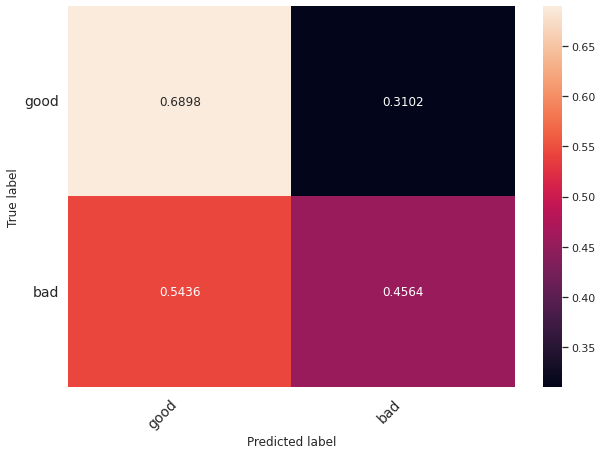

In [ ]:

# Calculate confusion matrix
confusion_matrix_rf = confusion_matrix(y_true = bankcredit_test_rf['TARGET'], 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.4f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

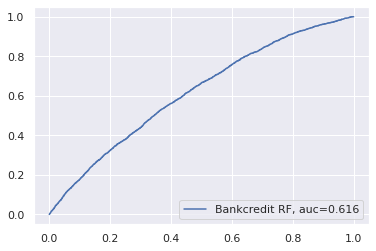

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(bankcredit_test_rf['TARGET'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankcredit_test_rf['TARGET'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Bankcredit RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
bankcredit_train_rf.iloc[:, :-1].columns

Index(['MONTHS_IN_RESIDENCE', 'PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES',
       'AGE', 'RESIDENCIAL_ZIP_3', 'TotalAvg_Worth_Ratio', 'Total_CreditCards',
       'POSTAL_ADDRESS_TYPE_1', 'POSTAL_ADDRESS_TYPE_2', 'MARITAL_STATUS_0',
       'MARITAL_STATUS_1', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3',
       'MARITAL_STATUS_4', 'MARITAL_STATUS_5', 'MARITAL_STATUS_6',
       'MARITAL_STATUS_7', 'FLAG_RESIDENCIAL_PHONE_0',
       'FLAG_RESIDENCIAL_PHONE_1', 'RESIDENCE_TYPE_0.0', 'RESIDENCE_TYPE_1.0',
       'RESIDENCE_TYPE_2.0', 'RESIDENCE_TYPE_3.0', 'RESIDENCE_TYPE_4.0',
       'RESIDENCE_TYPE_5.0', 'FLAG_EMAIL_0', 'FLAG_EMAIL_1', 'FLAG_VISA_0',
       'FLAG_VISA_1', 'FLAG_MASTERCARD_0', 'FLAG_MASTERCARD_1',
       'QUANT_BANKING_ACCOUNTS_0', 'QUANT_BANKING_ACCOUNTS_1',
       'QUANT_BANKING_ACCOUNTS_2', 'COMPANY_0', 'COMPANY_1',
       'FLAG_PROFESSIONAL_PHONE_0', 'FLAG_PROFESSIONAL_PHONE_1',
       'PROFESSION_CODE_0.0', 'PROFESSION_CODE_1.0', 'PROFESSION_CODE_2.0',
       'PROFESSION_CODE

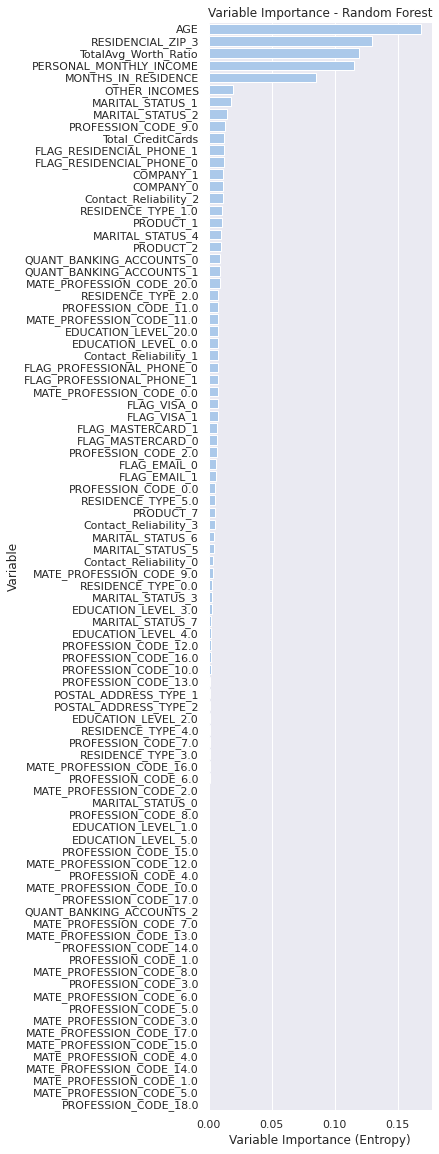

In [ ]:
# Plot variable importance
importances = bankcredit_rf.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(4, 20))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[bankcredit_train_rf.iloc[:, :-1].columns[i] for i in indices], 
            x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

plt.savefig('RFPlot.pdf', dpi=300, bbox_inches='tight')

##XGBoosting

In [ ]:
from xgboost import XGBClassifier
#Define the classifier.
XGB_Bankcredit = XGBClassifier(max_depth=2,                 # Depth of each tree
                            learning_rate=0.01,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights. G / B
                            base_score=0.1,               # Global bias. Set to average of the target rate.
                            random_state=251139213,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method = 'hist'
                            # tree_method='gpu_hist',       # How to train the trees?
                            # gpu_id=0                      # With which GPU? 
                            )

In [ ]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 150, 200],
                   'max_depth': [2, 3, 4],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.15]
                  })

In [ ]:
bankcredit_train_rf['RESIDENCIAL_ZIP_3'].astype('category')
bankcredit_test_rf['RESIDENCIAL_ZIP_3'].astype('category')


2        591
8        172
9        914
12       394
15       616
        ... 
49982    286
49990    960
49991    618
49995    591
49996    186
Name: RESIDENCIAL_ZIP_3, Length: 14851, dtype: category
Categories (698, object): [110, 111, 112, 113, ..., 996, 997, 998, 999]

In [ ]:
bankcredit_train_rf['RESIDENCIAL_ZIP_3'] = pd.to_numeric(bankcredit_train_rf['RESIDENCIAL_ZIP_3'], downcast='float' )
bankcredit_test_rf['RESIDENCIAL_ZIP_3'] = pd.to_numeric(bankcredit_test_rf['RESIDENCIAL_ZIP_3'], downcast='float' )

In [ ]:
bankcredit_train_rf.dtypes

MONTHS_IN_RESIDENCE        float64
PERSONAL_MONTHLY_INCOME    float64
OTHER_INCOMES              float64
AGE                          int64
RESIDENCIAL_ZIP_3          float32
                            ...   
Contact_Reliability_0        uint8
Contact_Reliability_1        uint8
Contact_Reliability_2        uint8
Contact_Reliability_3        uint8
TARGET                       int64
Length: 91, dtype: object

In [ ]:
# Always a good idea to tune on a reduce sample of the train set, as we will call many functions.
val_train = bankcredit_train_rf.sample(frac = 0.2,               # The fraction to extract
                                       random_state = 251139213,    # The seed.
                                       )

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankcredit,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
# Train grid search.
GridXGB.fit(val_train.iloc[:, :-1], val_train['TARGET'])

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.1, gamma=0.001,
                                     learning_rate=0.01, max_depth=2, n_jobs=2,
                                     random_state=251139213, reg_alpha=1,
                                     reg_lambda=0, subsample=0.632,
                                     tree_method='hist'),
             n_jobs=2,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 150, 200]},
             refit=False, scoring='roc_auc', verbose=1)

In [ ]:
# Show best params
print('The best AUC is %.3f' % GridXGB.best_score_)
GridXGB.best_params_

The best AUC is 0.606


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}

In [ ]:
# Create XGB with best parameters.
XGB_Bankcredit = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), # Depth of each tree
                            learning_rate=GridXGB.best_params_.get('learning_rate'), # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=GridXGB.best_params_.get('n_estimators'), # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            #n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.1,               # Global bias. Set to average of the target rate.
                            random_state=251139213,        # Seed
                            missing=None,                 # How are nulls encoded?
                            tree_method = 'hist',
                            # tree_method='gpu_exact',       # How to train the trees?
                            # tree_method = 'gpu_hist',
                            gpu_id=0                      # With which GPU?
                            )

In [ ]:
bankcredit_train_rf.head()

,MONTHS_IN_RESIDENCE,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,RESIDENCIAL_ZIP_3,TotalAvg_Worth_Ratio,Total_CreditCards,POSTAL_ADDRESS_TYPE_1,POSTAL_ADDRESS_TYPE_2,MARITAL_STATUS_0,MARITAL_STATUS_1,MARITAL_STATUS_2,MARITAL_STATUS_3,MARITAL_STATUS_4,MARITAL_STATUS_5,MARITAL_STATUS_6,MARITAL_STATUS_7,FLAG_RESIDENCIAL_PHONE_0,FLAG_RESIDENCIAL_PHONE_1,RESIDENCE_TYPE_0.0,RESIDENCE_TYPE_1.0,RESIDENCE_TYPE_2.0,RESIDENCE_TYPE_3.0,RESIDENCE_TYPE_4.0,RESIDENCE_TYPE_5.0,FLAG_EMAIL_0,FLAG_EMAIL_1,FLAG_VISA_0,FLAG_VISA_1,FLAG_MASTERCARD_0,FLAG_MASTERCARD_1,QUANT_BANKING_ACCOUNTS_0,QUANT_BANKING_ACCOUNTS_1,QUANT_BANKING_ACCOUNTS_2,COMPANY_0,COMPANY_1,FLAG_PROFESSIONAL_PHONE_0,FLAG_PROFESSIONAL_PHONE_1,PROFESSION_CODE_0.0,PROFESSION_CODE_1.0,...,PROFESSION_CODE_13.0,PROFESSION_CODE_14.0,PROFESSION_CODE_15.0,PROFESSION_CODE_16.0,PROFESSION_CODE_17.0,PROFESSION_CODE_18.0,MATE_PROFESSION_CODE_0.0,MATE_PROFESSION_CODE_1.0,MATE_PROFESSION_CODE_2.0,MATE_PROFESSION_CODE_3.0,MATE_PROFESSION_CODE_4.0,MATE_PROFESSION_CODE_5.0,MATE_PROFESSION_CODE_6.0,MATE_PROFESSION_CODE_7.0,MATE_PROFESSION_CODE_8.0,MATE_PROFESSION_CODE_9.0,MATE_PROFESSION_CODE_10.0,MATE_PROFESSION_CODE_11.0,MATE_PROFESSION_CODE_12.0,MATE_PROFESSION_CODE_13.0,MATE_PROFESSION_CODE_14.0,MATE_PROFESSION_CODE_15.0,MATE_PROFESSION_CODE_16.0,MATE_PROFESSION_CODE_17.0,MATE_PROFESSION_CODE_20.0,EDUCATION_LEVEL_0.0,EDUCATION_LEVEL_1.0,EDUCATION_LEVEL_2.0,EDUCATION_LEVEL_3.0,EDUCATION_LEVEL_4.0,EDUCATION_LEVEL_5.0,EDUCATION_LEVEL_20.0,PRODUCT_1,PRODUCT_2,PRODUCT_7,Contact_Reliability_0,Contact_Reliability_1,Contact_Reliability_2,Contact_Reliability_3,TARGET
0,15.0,900.0,0.0,32,595.0,450.0,2,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
1,1.0,750.0,0.0,34,230.0,750.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
3,6.0,500.0,0.0,61,545.0,500.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,12.0,1200.0,0.0,48,235.0,1200.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
5,4.0,500.0,0.0,40,371.0,500.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
# Train over all training data.
XGB_Bankcredit.fit(bankcredit_train_rf.iloc[:, :-1], bankcredit_train_rf['TARGET'])

XGBClassifier(base_score=0.1, gamma=0.001, gpu_id=0, learning_rate=0.05,
              n_estimators=50, random_state=251139213, reg_alpha=1,
              reg_lambda=0, subsample=0.632, tree_method='hist')

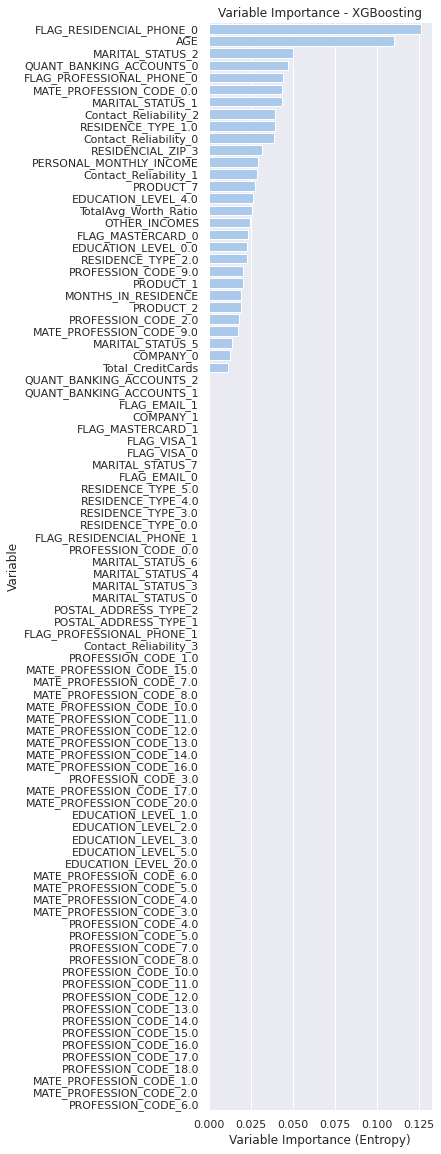

In [ ]:
# Plot variable importance
importances = XGB_Bankcredit.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(4, 20))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[bankcredit_train_rf.iloc[:, :-1].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)
plt.savefig('XGBPlot.pdf', dpi=300, bbox_inches='tight')


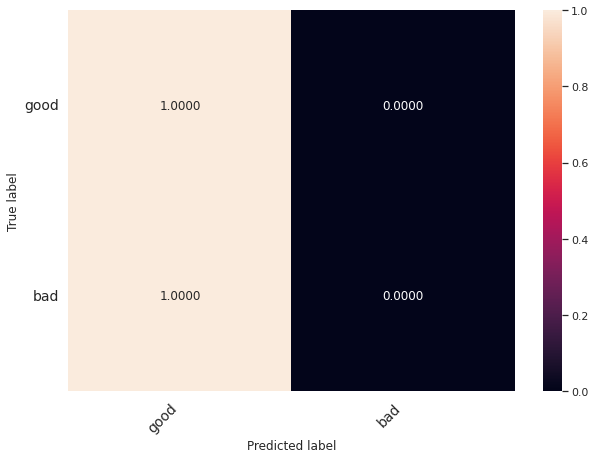

In [ ]:
# Calculate probability
XGBClassTest = XGB_Bankcredit.predict(bankcredit_test_rf.iloc[:, :-1])
xg_probs_test = XGB_Bankcredit.predict_proba(bankcredit_test_rf.iloc[:, :-1])
xg_probs_test = xg_probs_test[:, 1]

# Calculate confusion matrix
confusion_matrix_xgb = confusion_matrix(y_true = bankcredit_test_rf['TARGET'], 
                    y_pred = XGBClassTest)

# Turn matrix to percentages
confusion_matrix_xgb = confusion_matrix_xgb.astype('float') / confusion_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xgb, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.4f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()

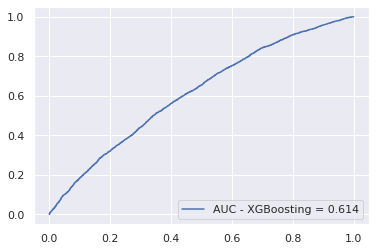

In [ ]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(bankcredit_test_rf['TARGET'], 
                                 xg_probs_test)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = bankcredit_test_rf['TARGET'], 
                             y_score = xg_probs_test),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

TreeSHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 371 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509235 sha256=105613cb38b36738754b8d305d4459e92d37a652b8aadfc1ec62beb33f60f762
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap
shap.initjs() # Import Java engine.

In [ ]:
# Trains the game-theoretic model. Really complex so requires sampling.
explainer = shap.TreeExplainer(XGB_Bankcredit,                         # The model    
                              data = shap.sample(bankcredit_train_rf.iloc[:, :-1],
                                                 100)  # Create a sample of 100 cases
                              )

# Applies model ot the full dataset.
shap_values = explainer.shap_values(bankcredit_train_rf.iloc[:, :-1],
                                    check_additivity=False)

 99%|===================| 34433/34655 [00:30<00:00]       

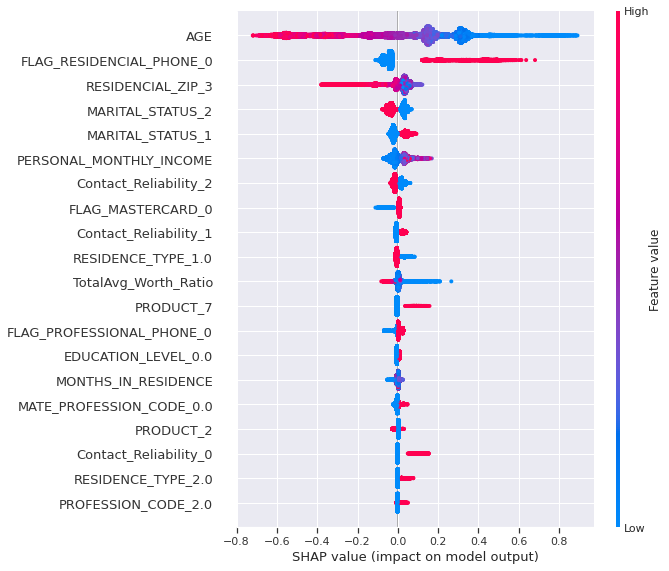

In [ ]:
shap.summary_plot(shap_values,                       # The Shapley values.
                  bankcredit_train_rf.iloc[:, :-1], # The training sample
                  show=False)                        # Whether to print the model or not

# Let's save this as a PDF for later use.
plt.savefig('ShapSummaryPlot.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# shap.dependence_plot("FLAG_RESIDENCIAL_PHONE",                          # The variable to study
#                      shap_values,                       # The Shapley values.
#                      bankcredit_train_rf.iloc[:, :-1], # The training sample
#                      show=False)                        # Whether to print the model or not

# plt.savefig('ShapPHONE.pdf', dpi=300, bbox_inches='tight')
# plt.show()

ROC Curves

In [ ]:
# Predict probabilities of scorecard.
# logreg_probs_test = bankcredit_logreg.predict_proba(bankcredit_test_rf.iloc[:, 1:])

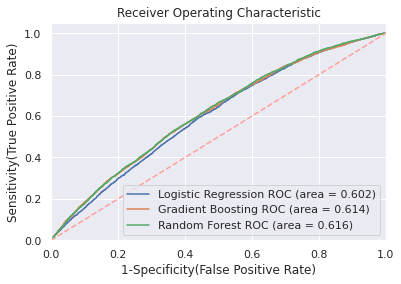

In [ ]:
# Set models and probabilities. This structure is called a dictionary.
models = [
{
    'label': 'Logistic Regression',
    'data' : bankcredit_test_noWoE['TARGET'],
    'probs': probs_test[:,1]
},
{
    'label': 'Gradient Boosting',
     'data' : bankcredit_test_rf['TARGET'],
    'probs': xg_probs_test
},
{
    'label': 'Random Forest',
     'data' : bankcredit_test_rf['TARGET'],
    'probs': rf_probs_test[:,1]
}
]

# Loop that creates the plot. I will pass each ROC curve one by one.
for m in models:
  auc = roc_auc_score(y_true = m['data'], 
                             y_score = m['probs'])
  fpr, tpr, thresholds = roc_curve(m['data'], 
                                           m['probs'])
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
                 

    
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
    
# Plot!    
plt.show()